# Project : AQI Prediction

Machine Learning and AI has done wonders for Weather related tasks .
Predicting AQI , rain, cyclone and other weather forecast become extremely accurate .

In this project i have predict AQI which is our target variable based on few indipendent features . I have done indepth EDA to extract very important insights like in monsoon the AQI is the lowest in India and Northeastern cities are very less polluted .

I have used regression method and used 6 algorithms to find the most accurate one . One algorithm got a r2_score of more than 93% which is highest . Please have a look below if you want to explore more .

In [11]:
import numpy as np ## Importing numpy library for data analysis .
import pandas as pd ## Importing Pandas library for data analysis
import matplotlib.pyplot as plt ## Importing matplotlib library for data visualization .
%matplotlib inline
import seaborn as sns   ## Importing seaborn library for data visualization .
import plotly.express as px ## Importing plotly express for advance data visualization .

In [12]:
AQI_main=pd.read_csv("/content/city_day.csv")
aqi=AQI_main.copy() ## Create a copy of our dataset for further analysis .
aqi.head() ## head function will show us the top 5 rows .

City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN

In [13]:
print("Size of this dataset :", aqi.shape)

Size of this dataset : (29531, 16)


In [14]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [15]:
aqi=aqi.drop(['AQI_Bucket'],axis=1)
aqi.head() ## head function will show us the top 5 rows .

City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI  
0  133.36     0.00     0.02    0.00  NaN  
1   34.06     3.68     5.50    3.77  NaN  
2   30.70     6.80    16.40    2.25  NaN  
3   36.08     4.43    10.14    1.00  NaN  
4   39.31     7.01    18.89    2.78  NaN

In [16]:
aqi.isnull().sum() ## isnull().sum() will show us the total no of null values in each column .

City           0
Date           0
PM2.5       4598
PM10       11140
NO          3582
NO2         3585
NOx         4185
NH3        10328
CO          2059
SO2         3854
O3          4022
Benzene     5623
Toluene     8041
Xylene     18109
AQI         4681
dtype: int64

In [17]:
aqi.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [18]:
## Renaming some columns to make them much easier to understand .
aqi=aqi.rename(columns={'PM2.5':'PM2_5','PM10':'PM_10','NO2':'NO_2','NH3':'NH_3','SO2':'SO_2','O3':'O_3'})

In [19]:
## Created a for loop to see the percentage of null values in all numeric columns .
num_columns=aqi.drop(['City','Date'],axis=1)
for i in num_columns :
  print(f"Percentage of null values in {i} :" , (num_columns[i].isnull().sum()*100)/len(aqi))

Percentage of null values in PM2_5 : 15.570078900138837
Percentage of null values in PM_10 : 37.72307067149775
Percentage of null values in NO : 12.129626494192543
Percentage of null values in NO_2 : 12.139785310351833
Percentage of null values in NOx : 14.171548542209882
Percentage of null values in NH_3 : 34.97341776438319
Percentage of null values in CO : 6.972334157326199
Percentage of null values in SO_2 : 13.050692492634859
Percentage of null values in O_3 : 13.619586197555112
Percentage of null values in Benzene : 19.041007754563
Percentage of null values in Toluene : 27.229013578950934
Percentage of null values in Xylene : 61.32200060952897
Percentage of null values in AQI : 15.851139480545868


In [20]:
fig=px.scatter(aqi,x='AQI',y='Xylene',width=650,height=650,trendline='ols')
fig.show()

Creating a for loop with histogram for all the numeric columns to see their distribution and also we can see each columns mean , median and mean+3 standard deviation value .  

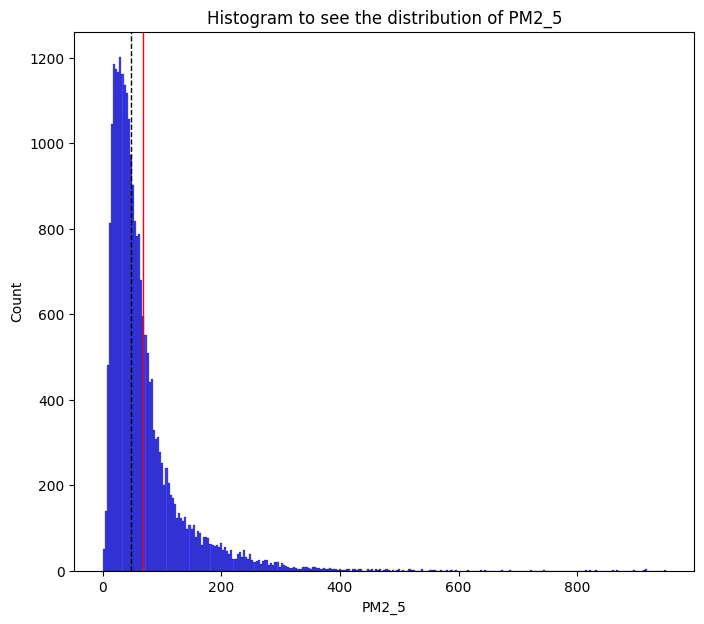

--------------------------------------
Mean value of PM2_5 : 67.45057794890306
Median value of PM2_5 : 48.57
Value of Mean+3sd in positive side for PM2_5 : 261.4349263203566


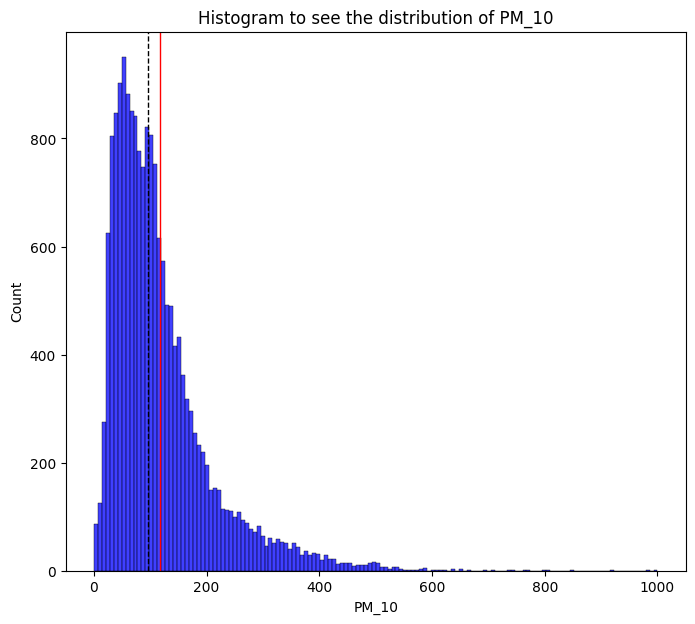

--------------------------------------
Mean value of PM_10 : 118.12710293078135
Median value of PM_10 : 95.68
Value of Mean+3sd in positive side for PM_10 : 389.9424320841649


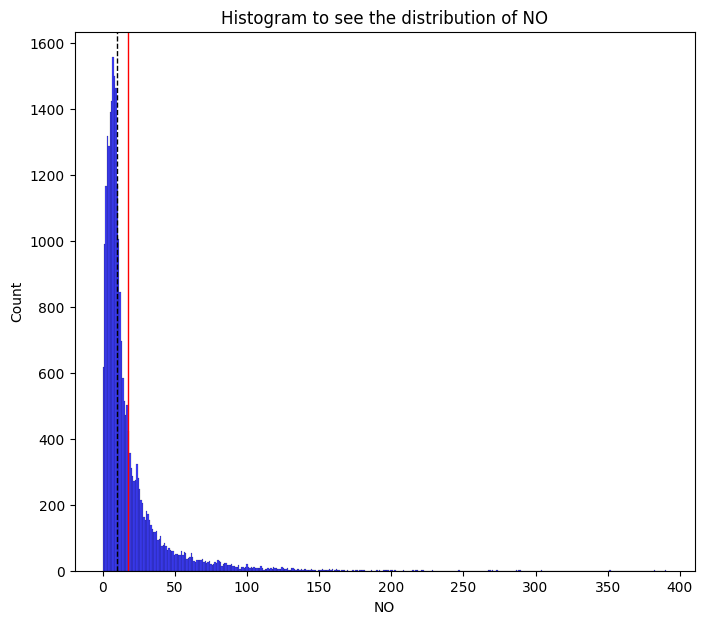

--------------------------------------
Mean value of NO : 17.574729662029362
Median value of NO : 9.89
Value of Mean+3sd in positive side for NO : 85.93226866402819


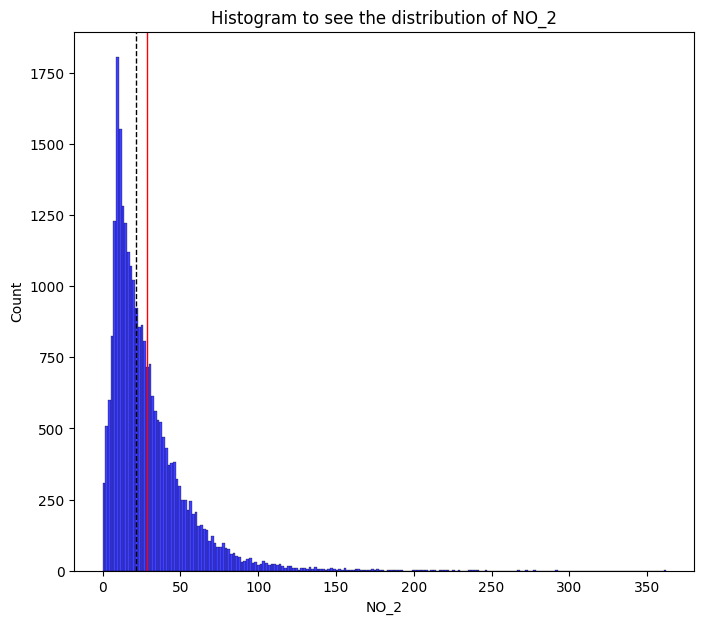

--------------------------------------
Mean value of NO_2 : 28.560659061126955
Median value of NO_2 : 21.69
Value of Mean+3sd in positive side for NO_2 : 101.98489644789525


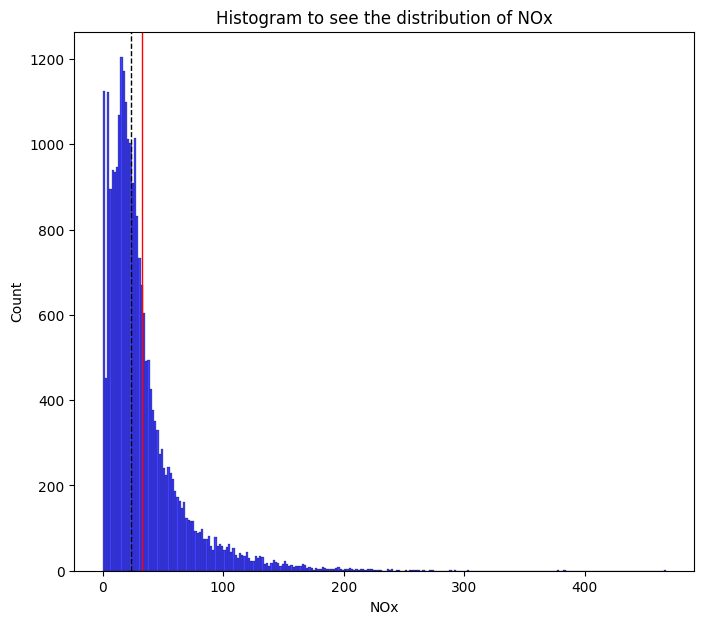

--------------------------------------
Mean value of NOx : 32.30912333307031
Median value of NOx : 23.52
Value of Mean+3sd in positive side for NOx : 127.24715614269545


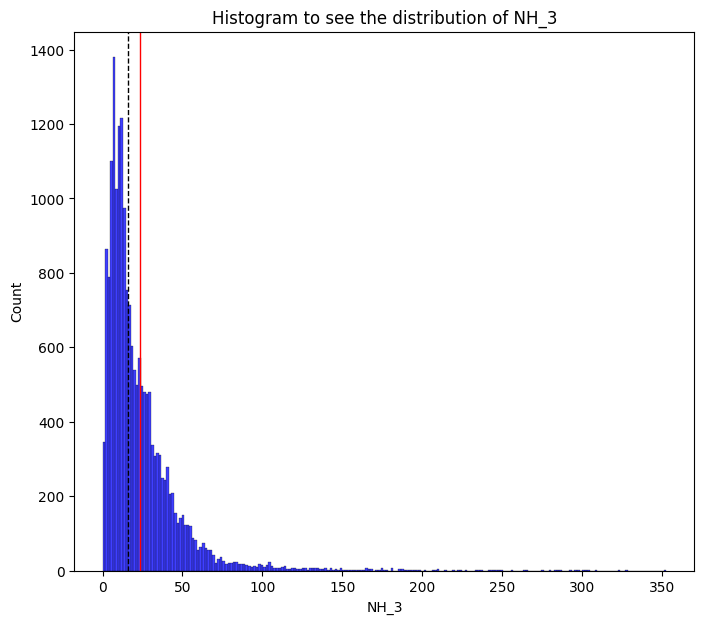

--------------------------------------
Mean value of NH_3 : 23.48347601937197
Median value of NH_3 : 15.85
Value of Mean+3sd in positive side for NH_3 : 100.5363010078728


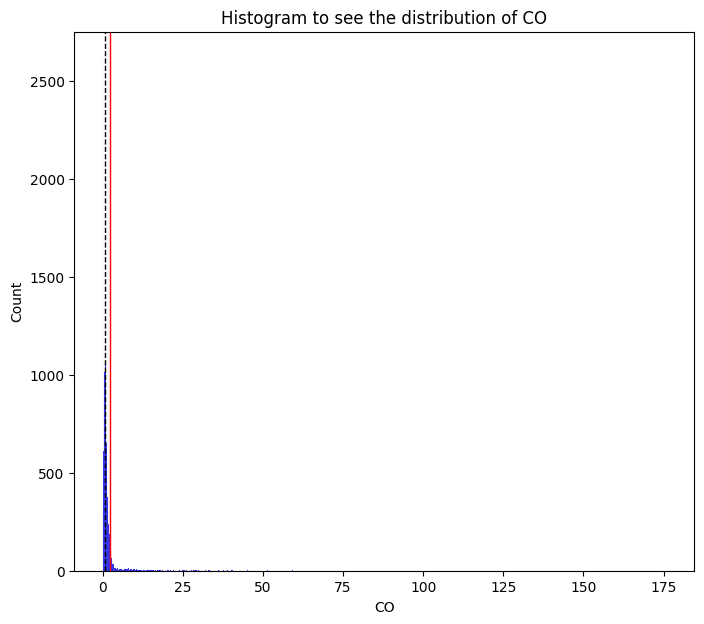

--------------------------------------
Mean value of CO : 2.2485982090856145
Median value of CO : 0.89
Value of Mean+3sd in positive side for CO : 23.13725097165341


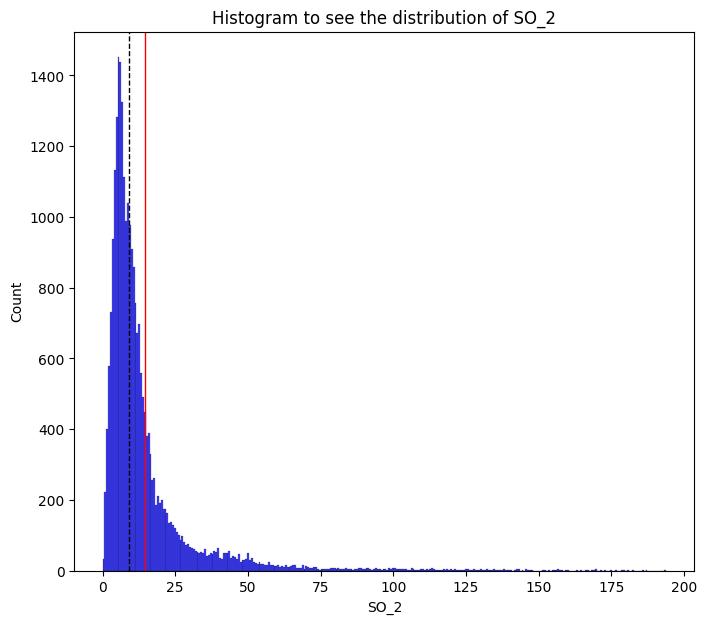

--------------------------------------
Mean value of SO_2 : 14.53197725590996
Median value of SO_2 : 9.16
Value of Mean+3sd in positive side for SO_2 : 68.93330179335369


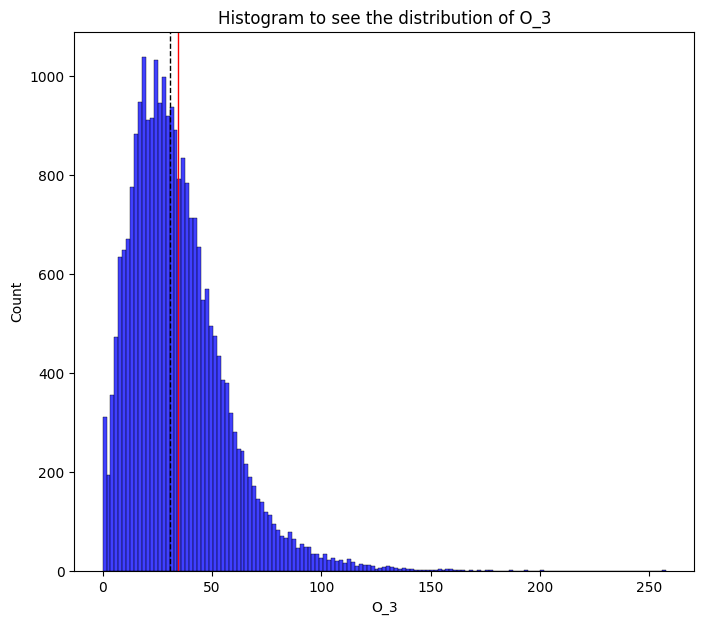

--------------------------------------
Mean value of O_3 : 34.49143047551845
Median value of O_3 : 30.84
Value of Mean+3sd in positive side for O_3 : 99.57621505585254


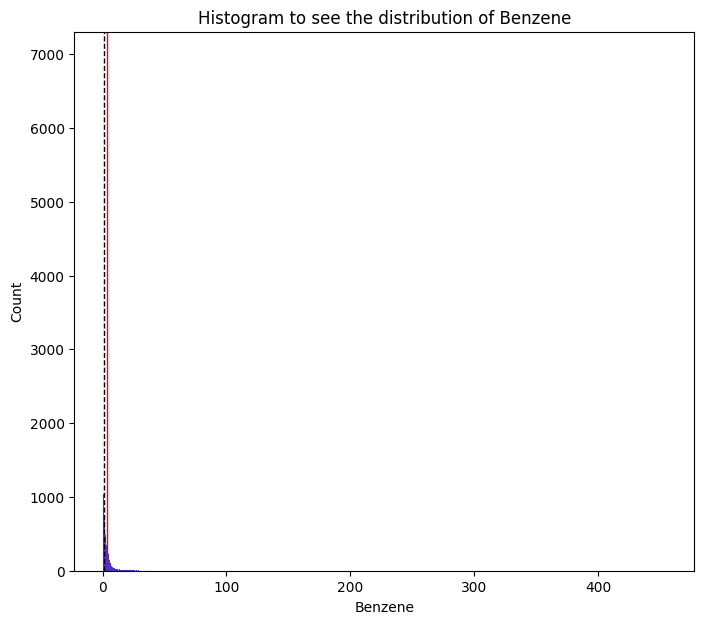

--------------------------------------
Mean value of Benzene : 3.280840304500585
Median value of Benzene : 1.07
Value of Mean+3sd in positive side for Benzene : 50.7142495663213


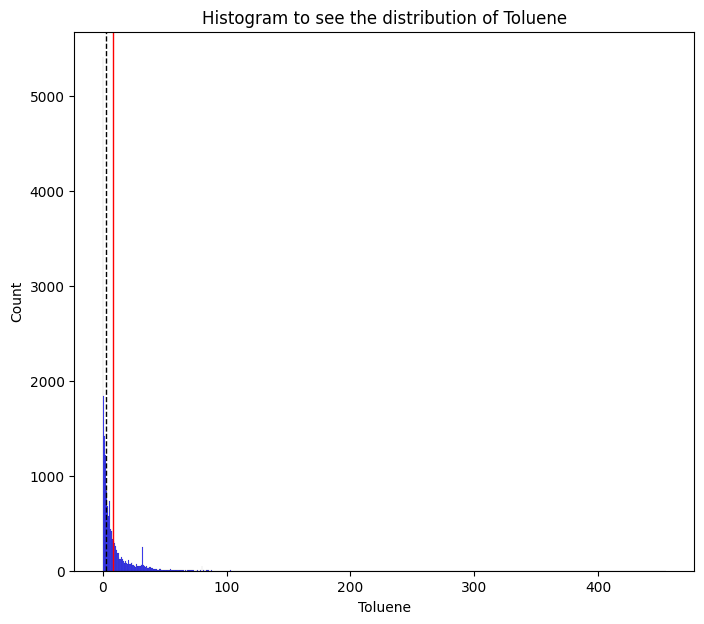

--------------------------------------
Mean value of Toluene : 8.700972080037227
Median value of Toluene : 2.97
Value of Mean+3sd in positive side for Toluene : 68.6084630521591


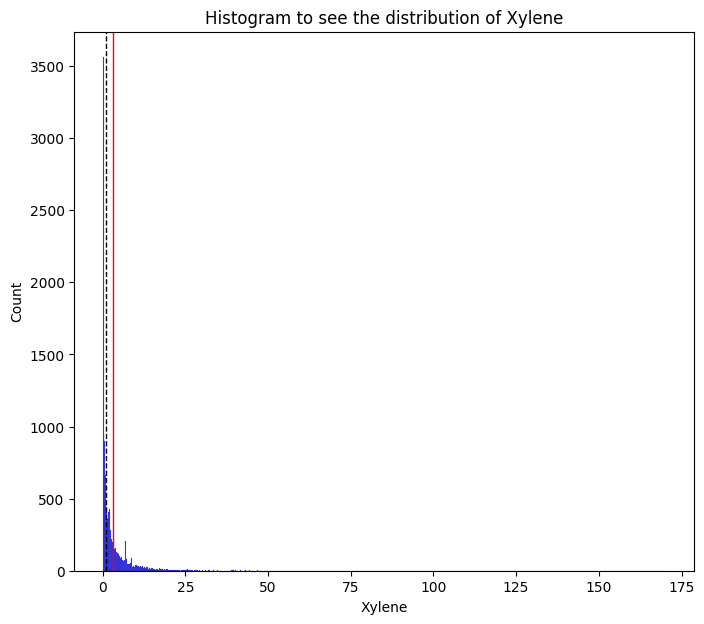

--------------------------------------
Mean value of Xylene : 3.0701278234985114
Median value of Xylene : 0.98
Value of Mean+3sd in positive side for Xylene : 22.039870044928406


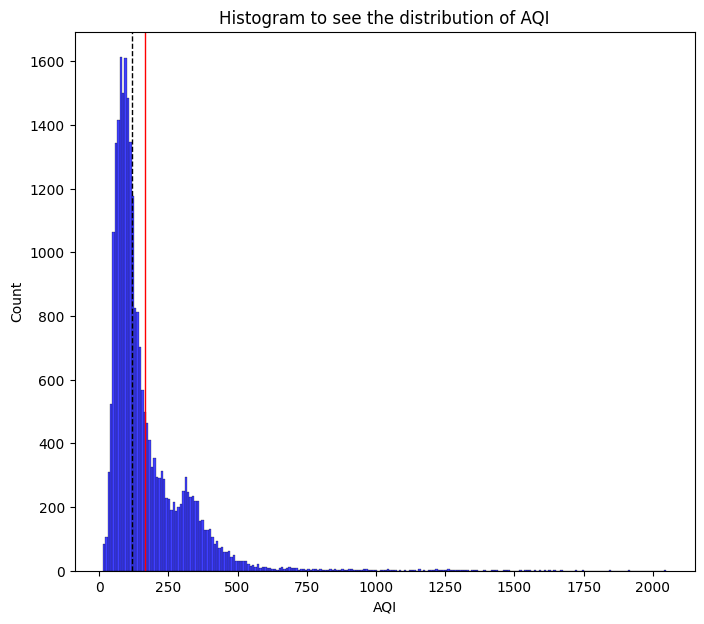

--------------------------------------
Mean value of AQI : 166.4635814889336
Median value of AQI : 118.0
Value of Mean+3sd in positive side for AQI : 588.5533367713807


In [21]:
for i in num_columns.columns : ## Creating the for loop .
  plt.figure(figsize=(8,7)) ## Selecting the size of each plot .
  sns.histplot(data=num_columns,x=i,color='blue')
  plt.axvline(x=num_columns[i].mean(),color='red',linewidth=1,linestyle='solid') ## Creating a line for mean .
  plt.axvline(x=num_columns[i].median(),color='black',linewidth=1,linestyle='dashed') ## Creating a line for median .
  plt.title(f"Histogram to see the distribution of {i}")
  plt.show() ## show will show all the visuals .
  print("--------------------------------------")
  print(f"Mean value of {i} :", num_columns[i].mean())
  print(f"Median value of {i} :", num_columns[i].median())
  print(f"Value of Mean+3sd in positive side for {i} :", num_columns[i].mean()+(3*num_columns[i].std()))

All these columns are highly right skewed which means they have extreme values in positive or higher side . Xylene,Toluene,Benzene are extremely right skewed with soo many outliers .

AQI and PM2_5 more than 500 is not shown by any weather or meterological department in the world . Soo all the rows in AQI and PM2_5 where the value is more than 500 will be converted into null values .

Creating a for loop with boxplot for all the columns to visualize the outliers in positive and negative side .

To get the outliers the equation is (q3+1.5iqr) and (q1-1.5iqr) . Any values above (q3+1.5iqr) and any values less than (q1-1.5iqr) can be considerd as an outlier .

I have also printed the values of Min , Max and skewness for each column .

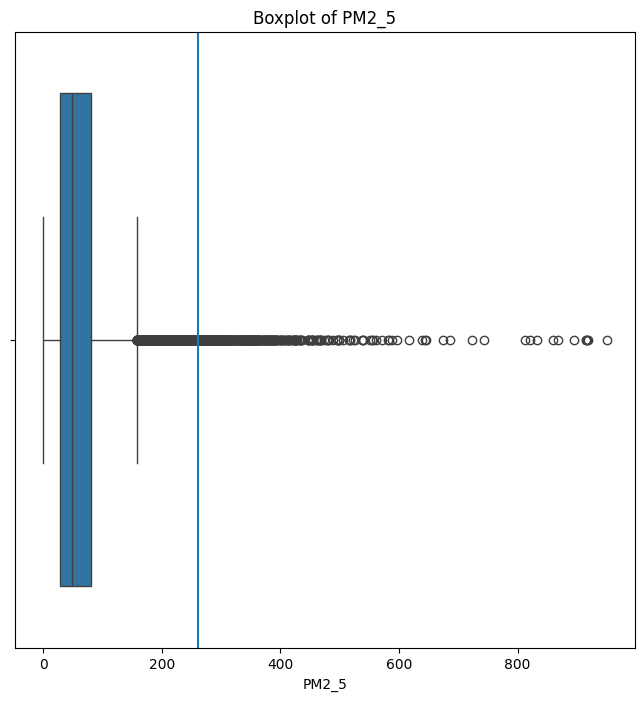

----------------------------------
Min value of PM2_5 : 0.04
Max value of PM2_5 : 949.99
Skewness of PM2_5 : 3.3699598508656305
Anything more than this value can be considered as Outliers for PM2_5 : nan


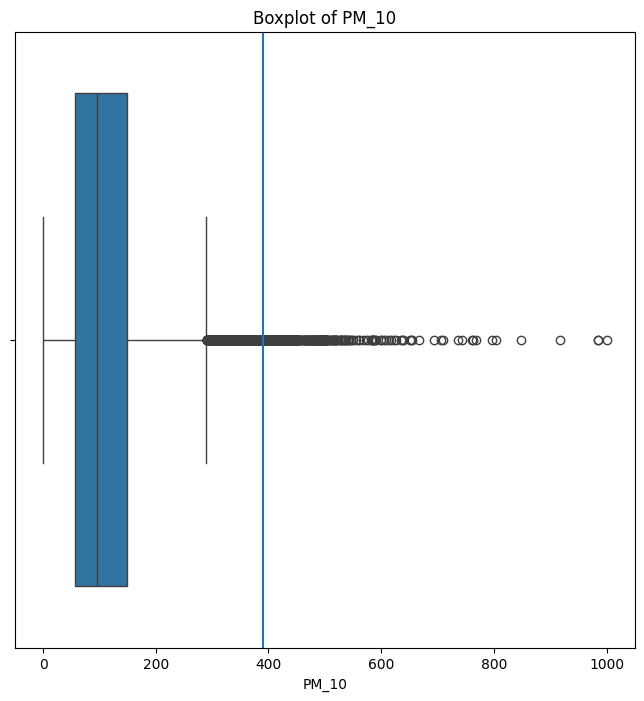

----------------------------------
Min value of PM_10 : 0.01
Max value of PM_10 : 1000.0
Skewness of PM_10 : 2.0531890996443773
Anything more than this value can be considered as Outliers for PM_10 : nan


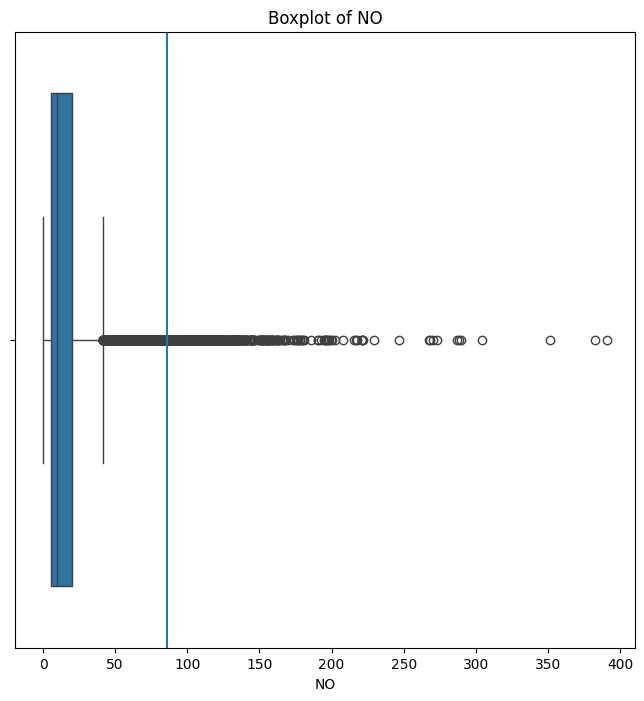

----------------------------------
Min value of NO : 0.02
Max value of NO : 390.68
Skewness of NO : 3.8831662754061522
Anything more than this value can be considered as Outliers for NO : nan


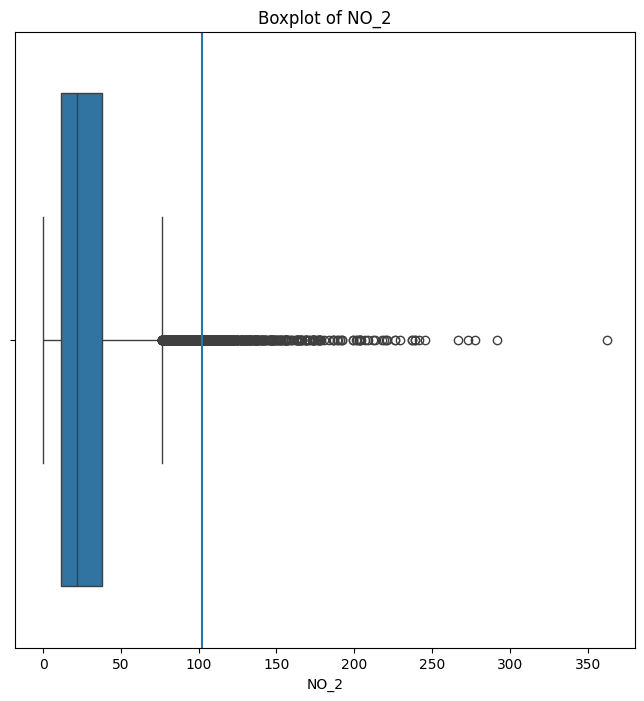

----------------------------------
Min value of NO_2 : 0.01
Max value of NO_2 : 362.21
Skewness of NO_2 : 2.46455958981977
Anything more than this value can be considered as Outliers for NO_2 : nan


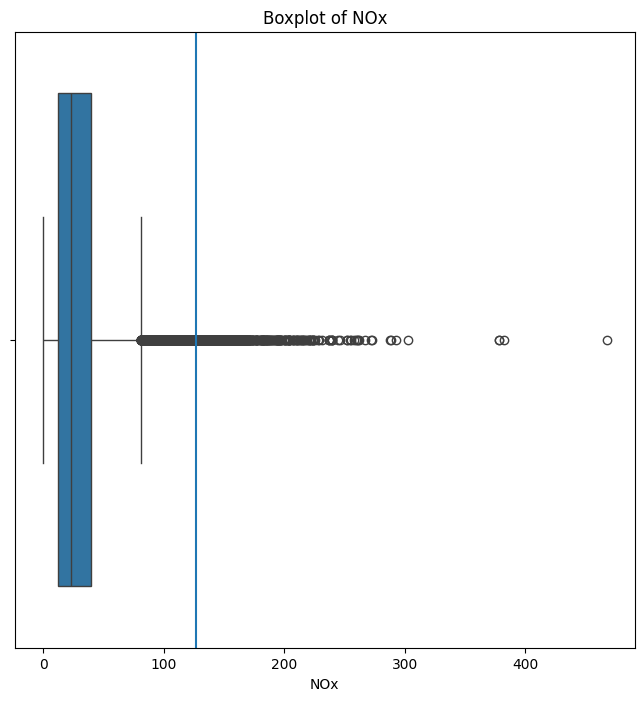

----------------------------------
Min value of NOx : 0.0
Max value of NOx : 467.63
Skewness of NOx : 2.5699146172425547
Anything more than this value can be considered as Outliers for NOx : nan


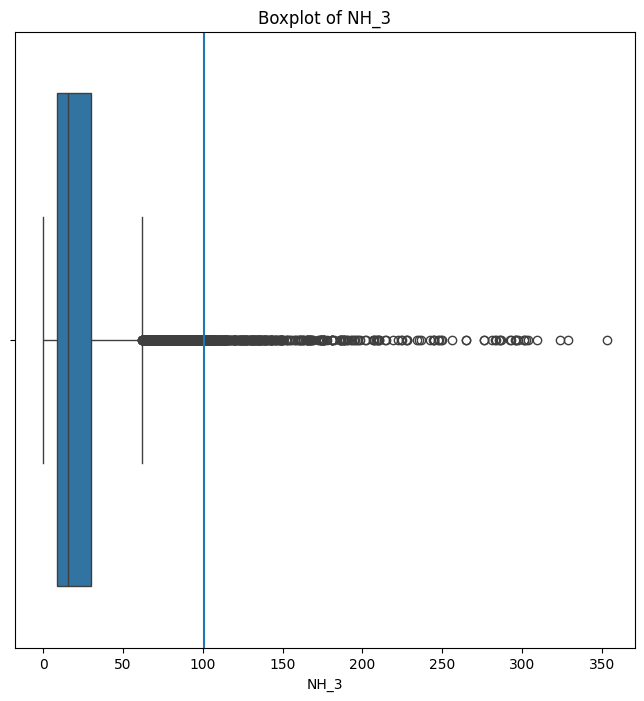

----------------------------------
Min value of NH_3 : 0.01
Max value of NH_3 : 352.89
Skewness of NH_3 : 4.083993435995748
Anything more than this value can be considered as Outliers for NH_3 : nan


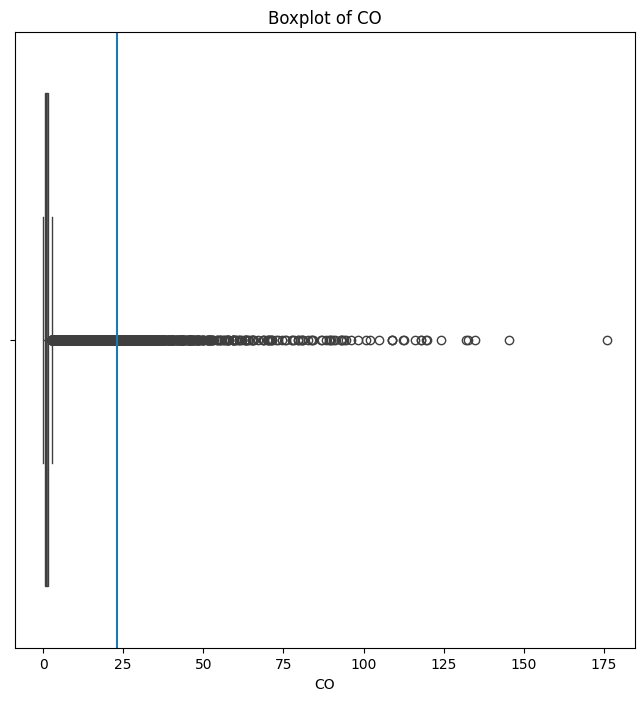

----------------------------------
Min value of CO : 0.0
Max value of CO : 175.81
Skewness of CO : 8.87832152174809
Anything more than this value can be considered as Outliers for CO : nan


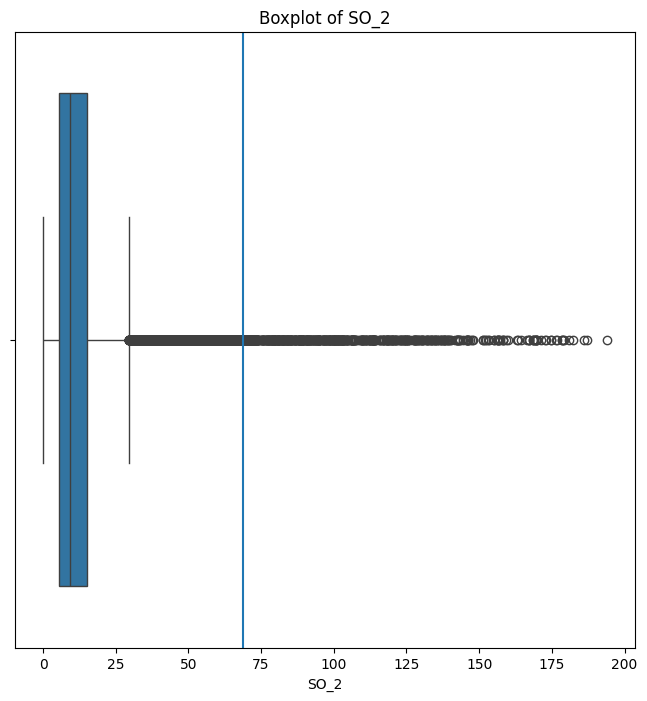

----------------------------------
Min value of SO_2 : 0.01
Max value of SO_2 : 193.86
Skewness of SO_2 : 4.083659554753711
Anything more than this value can be considered as Outliers for SO_2 : nan


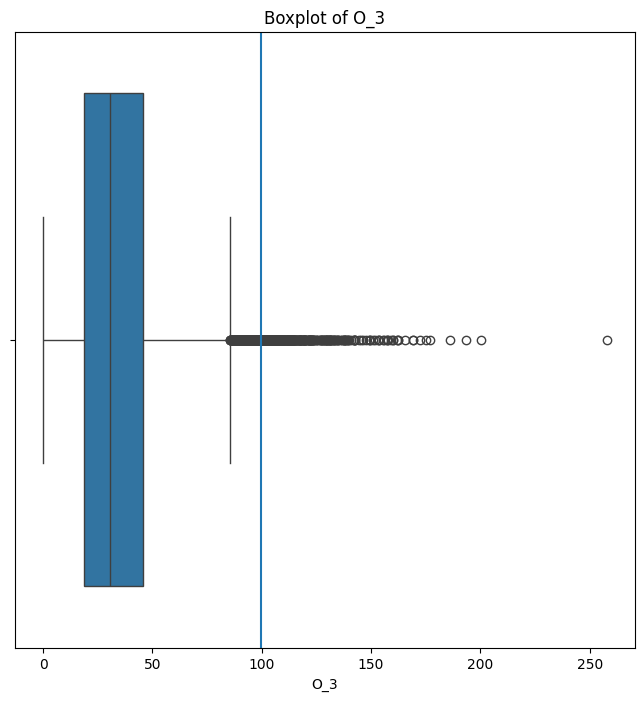

----------------------------------
Min value of O_3 : 0.01
Max value of O_3 : 257.73
Skewness of O_3 : 1.330119322144908
Anything more than this value can be considered as Outliers for O_3 : nan


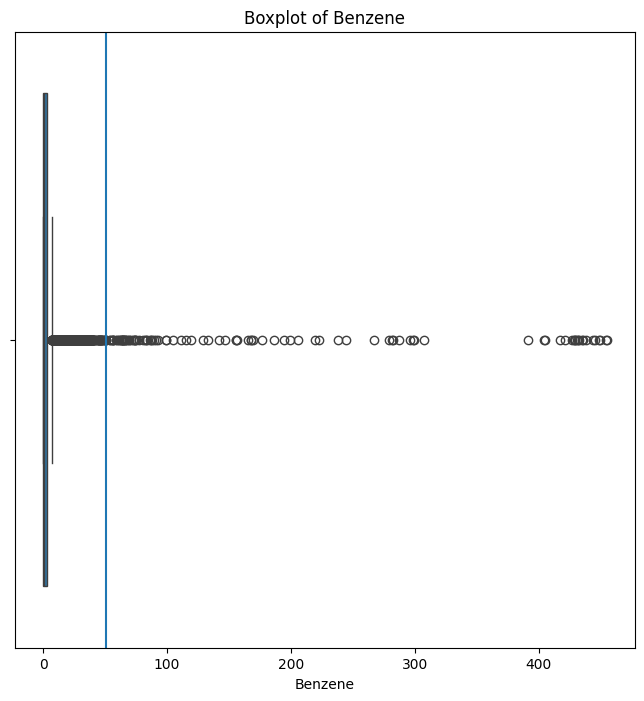

----------------------------------
Min value of Benzene : 0.0
Max value of Benzene : 455.03
Skewness of Benzene : 21.304218490790575
Anything more than this value can be considered as Outliers for Benzene : nan


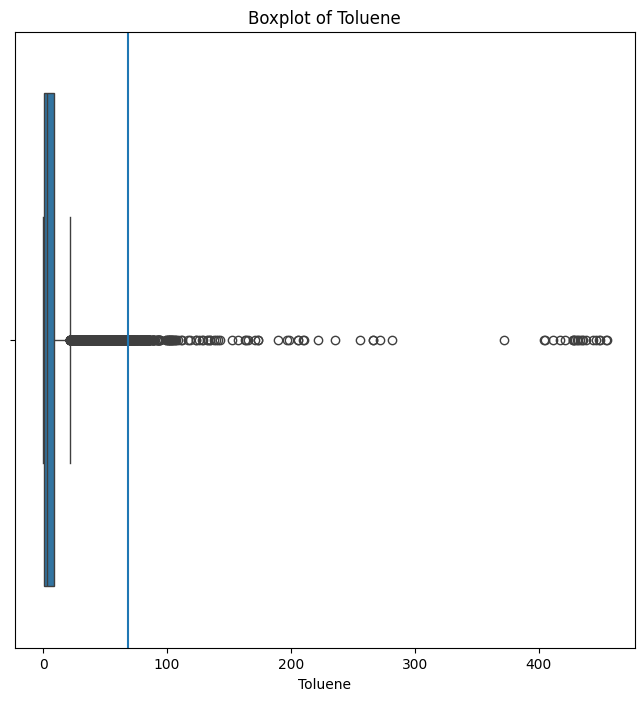

----------------------------------
Min value of Toluene : 0.0
Max value of Toluene : 454.85
Skewness of Toluene : 11.666128829133166
Anything more than this value can be considered as Outliers for Toluene : nan


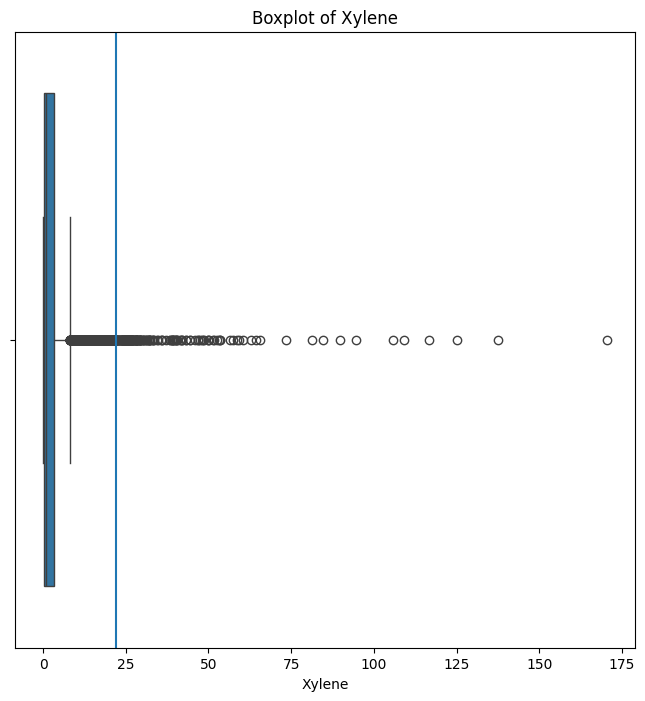

----------------------------------
Min value of Xylene : 0.0
Max value of Xylene : 170.37
Skewness of Xylene : 7.89151525367801
Anything more than this value can be considered as Outliers for Xylene : nan


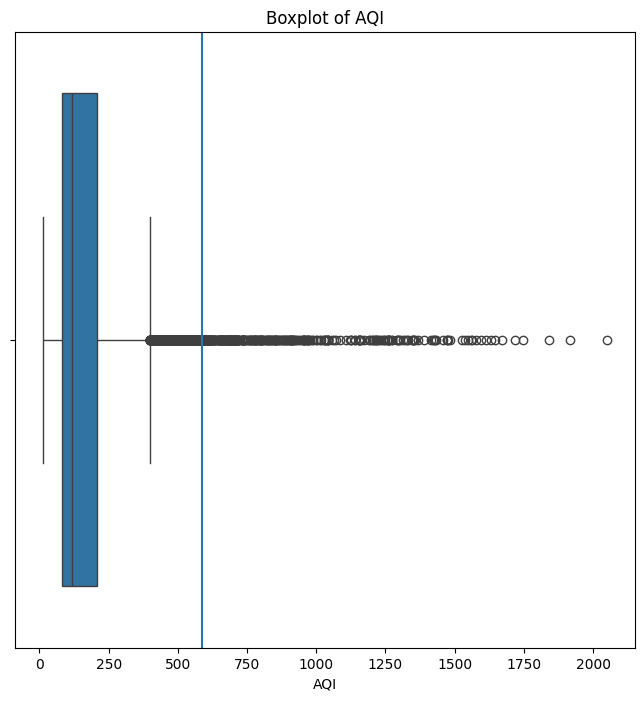

----------------------------------
Min value of AQI : 13.0
Max value of AQI : 2049.0
Skewness of AQI : 3.3967571978481037
Anything more than this value can be considered as Outliers for AQI : nan


In [22]:
for i in num_columns.columns : ## Creating the for loop .
  plt.figure(figsize=(8,8)) ## Selecting the size of each plot .
  sns.boxplot(data=num_columns,x=i)
  plt.axvline(x=num_columns[i].mean()+3*(num_columns[i].std()))
  plt.title(f"Boxplot of {i}")
  plt.show() ## show will show all the visuals .
  print("----------------------------------")
  print(f"Min value of {i} :", num_columns[i].min())
  print(f"Max value of {i} :", num_columns[i].max())
  print(f"Skewness of {i} :", num_columns[i].skew())
  print(f"Anything more than this value can be considered as Outliers for {i} :", np.percentile(num_columns[i],75,interpolation='midpoint')
  +1.5*(np.percentile(num_columns[i],75,interpolation='midpoint')-np.percentile(num_columns[i],25,interpolation='midpoint')))

It shows nan instead of outlier values because most of this columns has multiple null values .

In [23]:
aqi.AQI[aqi.AQI>=500]=np.nan ## Creating null values of all those datapoints which are excedding a certain pre defined range .
aqi.PM2_5[aqi.PM2_5>=500]=np.nan ## Creating null values of all those datapoints which are excedding a certain pre defined range .

<ipython-input-23-6f22faa09d18>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-6f22faa09d18>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
aqi.head() ## head function will show us the top 5 rows .

City        Date  PM2_5  PM_10     NO   NO_2    NOx  NH_3     CO  \
0  Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15   NaN   0.92   
1  Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46   NaN   0.97   
2  Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70   NaN  17.40   
3  Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97   NaN   1.70   
4  Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76   NaN  22.10   

    SO_2     O_3  Benzene  Toluene  Xylene  AQI  
0  27.64  133.36     0.00     0.02    0.00  NaN  
1  24.55   34.06     3.68     5.50    3.77  NaN  
2  29.07   30.70     6.80    16.40    2.25  NaN  
3  18.59   36.08     4.43    10.14    1.00  NaN  
4  39.33   39.31     7.01    18.89    2.78  NaN

In [25]:
aqi['Date']=pd.to_datetime(aqi['Date']) ## Changing the type of column to date type column .
aqi.head()

City       Date  PM2_5  PM_10     NO   NO_2    NOx  NH_3     CO  \
0  Ahmedabad 2015-01-01    NaN    NaN   0.92  18.22  17.15   NaN   0.92   
1  Ahmedabad 2015-01-02    NaN    NaN   0.97  15.69  16.46   NaN   0.97   
2  Ahmedabad 2015-01-03    NaN    NaN  17.40  19.30  29.70   NaN  17.40   
3  Ahmedabad 2015-01-04    NaN    NaN   1.70  18.48  17.97   NaN   1.70   
4  Ahmedabad 2015-01-05    NaN    NaN  22.10  21.42  37.76   NaN  22.10   

    SO_2     O_3  Benzene  Toluene  Xylene  AQI  
0  27.64  133.36     0.00     0.02    0.00  NaN  
1  24.55   34.06     3.68     5.50    3.77  NaN  
2  29.07   30.70     6.80    16.40    2.25  NaN  
3  18.59   36.08     4.43    10.14    1.00  NaN  
4  39.33   39.31     7.01    18.89    2.78  NaN

In [26]:
## Creating three columns of Day,Month and Year from our main date column .
aqi['Day']=aqi['Date'].dt.day
aqi['Month']=aqi['Date'].dt.month
aqi['Year']=aqi['Date'].dt.year

In [27]:
aqi.head() ## head function will show us the top 5 rows .

City       Date  PM2_5  PM_10     NO   NO_2    NOx  NH_3     CO  \
0  Ahmedabad 2015-01-01    NaN    NaN   0.92  18.22  17.15   NaN   0.92   
1  Ahmedabad 2015-01-02    NaN    NaN   0.97  15.69  16.46   NaN   0.97   
2  Ahmedabad 2015-01-03    NaN    NaN  17.40  19.30  29.70   NaN  17.40   
3  Ahmedabad 2015-01-04    NaN    NaN   1.70  18.48  17.97   NaN   1.70   
4  Ahmedabad 2015-01-05    NaN    NaN  22.10  21.42  37.76   NaN  22.10   

    SO_2     O_3  Benzene  Toluene  Xylene  AQI  Day  Month  Year  
0  27.64  133.36     0.00     0.02    0.00  NaN    1      1  2015  
1  24.55   34.06     3.68     5.50    3.77  NaN    2      1  2015  
2  29.07   30.70     6.80    16.40    2.25  NaN    3      1  2015  
3  18.59   36.08     4.43    10.14    1.00  NaN    4      1  2015  
4  39.33   39.31     7.01    18.89    2.78  NaN    5      1  2015

In [28]:
aqi=aqi.dropna(subset='AQI') ## Dropping all the null values in AQI column because it is our target variable .

In [29]:
aqi.isnull().sum() ## isnull().sum() will show us the total no of null values in each column .

City           0
Date           0
PM2_5        680
PM_10       6693
NO           387
NO_2         390
NOx         1835
NH_3        6061
CO           436
SO_2         597
O_3          776
Benzene     3518
Toluene     5802
Xylene     15291
AQI            0
Day            0
Month          0
Year           0
dtype: int64

In [30]:
## Created a for loop to see the percentage of null values in all columns .
for i in aqi :
  print(f"Total percentage of null values in {i} :", (aqi[i].isnull().sum()*100)/len(aqi))

Total percentage of null values in City : 0.0
Total percentage of null values in Date : 0.0
Total percentage of null values in PM2_5 : 2.797778234931084
Total percentage of null values in PM_10 : 27.537543715284922
Total percentage of null values in NO : 1.592264966056367
Total percentage of null values in NO_2 : 1.6046081053281218
Total percentage of null values in NOx : 7.549886854556676
Total percentage of null values in NH_3 : 24.93725570870191
Total percentage of null values in CO : 1.7938695741616952
Total percentage of null values in SO_2 : 2.4562847150792018
Total percentage of null values in O_3 : 3.1927586916272372
Total percentage of null values in Benzene : 14.47438798601111
Total percentage of null values in Toluene : 23.87163135157375
Total percentage of null values in Xylene : 62.91298086813413
Total percentage of null values in AQI : 0.0
Total percentage of null values in Day : 0.0
Total percentage of null values in Month : 0.0
Total percentage of null values in Year : 

Xylene has the highest of 62.91 % of null values and PM_10 has the 2nd highest with 27.53% .

In [31]:
fig=px.scatter(aqi,x='Xylene',y='AQI',width=650,height=650,trendline='ols')
fig.show()

Dropped Xylene column because it has 62.91% of null values which is highest and also it doesn't have a very high correlation with AQi .

In [32]:
aqi=aqi.drop(['Xylene'],axis=1)
aqi.head()

City       Date  PM2_5  PM_10     NO   NO_2    NOx  NH_3     CO  \
28  Ahmedabad 2015-01-29  83.13    NaN   6.93  28.71  33.72   NaN   6.93   
29  Ahmedabad 2015-01-30  79.84    NaN  13.85  28.68  41.08   NaN  13.85   
34  Ahmedabad 2015-02-04  80.65    NaN   2.37  22.83  24.00   NaN   2.37   
35  Ahmedabad 2015-02-05  58.36    NaN   2.60  21.39  23.31   NaN   2.60   
36  Ahmedabad 2015-02-06  79.29    NaN   1.16  26.94  26.83   NaN   1.16   

     SO_2    O_3  Benzene  Toluene    AQI  Day  Month  Year  
28  49.52  59.76     0.02      0.0  209.0   29      1  2015  
29  48.49  97.07     0.04      0.0  328.0   30      1  2015  
34  25.73  47.30     0.00      0.0  294.0    4      2  2015  
35  32.66  53.54     0.00      0.0  149.0    5      2  2015  
36  67.41  59.30     0.00      0.0  190.0    6      2  2015

In [33]:
## Creating an index column .
aqi['index']=np.arange(1,len(aqi)+1)
aqi.head()

City       Date  PM2_5  PM_10     NO   NO_2    NOx  NH_3     CO  \
28  Ahmedabad 2015-01-29  83.13    NaN   6.93  28.71  33.72   NaN   6.93   
29  Ahmedabad 2015-01-30  79.84    NaN  13.85  28.68  41.08   NaN  13.85   
34  Ahmedabad 2015-02-04  80.65    NaN   2.37  22.83  24.00   NaN   2.37   
35  Ahmedabad 2015-02-05  58.36    NaN   2.60  21.39  23.31   NaN   2.60   
36  Ahmedabad 2015-02-06  79.29    NaN   1.16  26.94  26.83   NaN   1.16   

     SO_2    O_3  Benzene  Toluene    AQI  Day  Month  Year  index  
28  49.52  59.76     0.02      0.0  209.0   29      1  2015      1  
29  48.49  97.07     0.04      0.0  328.0   30      1  2015      2  
34  25.73  47.30     0.00      0.0  294.0    4      2  2015      3  
35  32.66  53.54     0.00      0.0  149.0    5      2  2015      4  
36  67.41  59.30     0.00      0.0  190.0    6      2  2015      5

In [34]:
aqi.set_index('index',inplace=True)
aqi.head() ## head function will show us the top 5 rows .

City       Date  PM2_5  PM_10     NO   NO_2    NOx  NH_3     CO  \
index                                                                         
1      Ahmedabad 2015-01-29  83.13    NaN   6.93  28.71  33.72   NaN   6.93   
2      Ahmedabad 2015-01-30  79.84    NaN  13.85  28.68  41.08   NaN  13.85   
3      Ahmedabad 2015-02-04  80.65    NaN   2.37  22.83  24.00   NaN   2.37   
4      Ahmedabad 2015-02-05  58.36    NaN   2.60  21.39  23.31   NaN   2.60   
5      Ahmedabad 2015-02-06  79.29    NaN   1.16  26.94  26.83   NaN   1.16   

        SO_2    O_3  Benzene  Toluene    AQI  Day  Month  Year  
index                                                           
1      49.52  59.76     0.02      0.0  209.0   29      1  2015  
2      48.49  97.07     0.04      0.0  328.0   30      1  2015  
3      25.73  47.30     0.00      0.0  294.0    4      2  2015  
4      32.66  53.54     0.00      0.0  149.0    5      2  2015  
5      67.41  59.30     0.00      0.0  190.0    6      2  2015

In [35]:
## Creating two dataframes . one for all numeric columns and one for categorical columns .
num_aqi=aqi.drop(['City','Date'],axis=1)
cat_aqi=aqi[['City','Date']]

In [36]:
num_aqi.head() ## head function will show us the top 5 rows .

PM2_5  PM_10     NO   NO_2    NOx  NH_3     CO   SO_2    O_3  Benzene  \
index                                                                          
1      83.13    NaN   6.93  28.71  33.72   NaN   6.93  49.52  59.76     0.02   
2      79.84    NaN  13.85  28.68  41.08   NaN  13.85  48.49  97.07     0.04   
3      80.65    NaN   2.37  22.83  24.00   NaN   2.37  25.73  47.30     0.00   
4      58.36    NaN   2.60  21.39  23.31   NaN   2.60  32.66  53.54     0.00   
5      79.29    NaN   1.16  26.94  26.83   NaN   1.16  67.41  59.30     0.00   

       Toluene    AQI  Day  Month  Year  
index                                    
1          0.0  209.0   29      1  2015  
2          0.0  328.0   30      1  2015  
3          0.0  294.0    4      2  2015  
4          0.0  149.0    5      2  2015  
5          0.0  190.0    6      2  2015

In [37]:
cat_aqi.head() ## head function will show us the top 5 rows .

City       Date
index                      
1      Ahmedabad 2015-01-29
2      Ahmedabad 2015-01-30
3      Ahmedabad 2015-02-04
4      Ahmedabad 2015-02-05
5      Ahmedabad 2015-02-06

In [38]:
num_aqi.isnull().sum() ## isnull().sum() will show us the total no of null values in each column .

PM2_5       680
PM_10      6693
NO          387
NO_2        390
NOx        1835
NH_3       6061
CO          436
SO_2        597
O_3         776
Benzene    3518
Toluene    5802
AQI           0
Day           0
Month         0
Year          0
dtype: int64

In [39]:
pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 2.0 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=18f8eda547530f49b87f7d6a82819f5e03be6cc246a44975a2123250f668e59b
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=5b10ffe934b7ddb24f6bb9dd4e2d3a43c7930d7e9b45e56cfd65fa47eb39e35d
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


Imputing missing or null values : This dataset has too many missing values and some null values too . So if we only drop those rows then most of the datapoints will bw wiped off . That is why i have imputed all the missing and null values by using KNN imputer .

In [40]:
from fancyimpute import KNN
knn=KNN(k=5) ## k=5 means it will look for 5 closest neighbors .
num_aqi.iloc[:,:]=knn.fit_transform(num_aqi)

Imputing row 1/24305 with 2 missing, elapsed time: 226.553
Imputing row 101/24305 with 2 missing, elapsed time: 226.614
Imputing row 201/24305 with 2 missing, elapsed time: 226.666
Imputing row 301/24305 with 2 missing, elapsed time: 226.719
Imputing row 401/24305 with 2 missing, elapsed time: 226.781
Imputing row 501/24305 with 3 missing, elapsed time: 226.912
Imputing row 601/24305 with 2 missing, elapsed time: 227.009
Imputing row 701/24305 with 1 missing, elapsed time: 227.039
Imputing row 801/24305 with 1 missing, elapsed time: 227.075
Imputing row 901/24305 with 1 missing, elapsed time: 227.108
Imputing row 1001/24305 with 0 missing, elapsed time: 227.117
Imputing row 1101/24305 with 0 missing, elapsed time: 227.126
Imputing row 1201/24305 with 2 missing, elapsed time: 227.129
Imputing row 1301/24305 with 0 missing, elapsed time: 227.139
Imputing row 1401/24305 with 0 missing, elapsed time: 227.141
Imputing row 1501/24305 with 0 missing, elapsed time: 227.141
Imputing row 1601/24

In [41]:
## Using pd.concat to join two dataframes and make it one .
aqi_new=pd.concat([cat_aqi,num_aqi],axis=1)
aqi_new.head() ## head function will show us the top 5 rows .

City       Date  PM2_5       PM_10     NO   NO_2    NOx  \
index                                                                 
1      Ahmedabad 2015-01-29  83.13  202.106781   6.93  28.71  33.72   
2      Ahmedabad 2015-01-30  79.84  222.726928  13.85  28.68  41.08   
3      Ahmedabad 2015-02-04  80.65  177.819816   2.37  22.83  24.00   
4      Ahmedabad 2015-02-05  58.36  148.966012   2.60  21.39  23.31   
5      Ahmedabad 2015-02-06  79.29  193.834072   1.16  26.94  26.83   

            NH_3     CO   SO_2    O_3  Benzene  Toluene    AQI  Day  Month  \
index                                                                        
1      19.180451   6.93  49.52  59.76     0.02      0.0  209.0   29      1   
2      37.925330  13.85  48.49  97.07     0.04      0.0  328.0   30      1   
3      27.552862   2.37  25.73  47.30     0.00      0.0  294.0    4      2   
4      31.902713   2.60  32.66  53.54     0.00      0.0  149.0    5      2   
5       7.023861   1.16  67.41  59.30     0.00      0.0  190.0    6      2   

       Year  
index        
1      2015  
2      2015  
3      2015  
4      2015  
5      2015

In [42]:
aqi_new.isnull().sum() ## isnull().sum() will show us the total no of null values in each column .

City       0
Date       0
PM2_5      0
PM_10      0
NO         0
NO_2       0
NOx        0
NH_3       0
CO         0
SO_2       0
O_3        0
Benzene    0
Toluene    0
AQI        0
Day        0
Month      0
Year       0
dtype: int64

**Boxplot :**     

Boxplot to see q1,q2 or median, q3, min, max and outliers in positive and negative side

In [43]:
fig=px.box(aqi_new,y='AQI',color='City',height=850,width=1150,
           title='Boxplot of AQI of different cities')
fig.show()

**Boxplot of AQI by different Cities :**     

Ahmedabad,Delhi, Patna and Gurugram has the highest median AQI .

Aizwal,Shillong and Coimbatore has the lowest .

In [44]:
fig=px.box(aqi_new,y='AQI',color='Month',width=1050,height=850,title=
           'Boxplot of AQI by different Months')
fig.show()

**Boxplot of AQI by Months :**     

January and December has the highest median AQI of 176.

July and August has the lowest median AQI of 85 and 84 .

In [45]:
fig=px.box(aqi_new,y='PM2_5',color='City',height=850,width=1150,
           title='Boxplot of PM2_5 in different cities')
fig.show()

**Boxplot of PM2.5 by different Cities :**     

Delhi,Gurugram and patna has the highest median PM2.5 .

Aizwal,Shillong and Kochi has the lowest .

In [46]:
fig=px.box(aqi_new,y='PM_10',color='City',height=850,width=1150,
           title='Boxplot of PM_10 of different cities')
fig.show()

**Boxplot of PM_10 by different Cities :**     

Delhi,Gurugram and patna has the highest median PM_10 .

Aizwal,Shillong and Coimbatore has the lowest .

In [47]:
aqi_new.head()

City       Date  PM2_5       PM_10     NO   NO_2    NOx  \
index                                                                 
1      Ahmedabad 2015-01-29  83.13  202.106781   6.93  28.71  33.72   
2      Ahmedabad 2015-01-30  79.84  222.726928  13.85  28.68  41.08   
3      Ahmedabad 2015-02-04  80.65  177.819816   2.37  22.83  24.00   
4      Ahmedabad 2015-02-05  58.36  148.966012   2.60  21.39  23.31   
5      Ahmedabad 2015-02-06  79.29  193.834072   1.16  26.94  26.83   

            NH_3     CO   SO_2    O_3  Benzene  Toluene    AQI  Day  Month  \
index                                                                        
1      19.180451   6.93  49.52  59.76     0.02      0.0  209.0   29      1   
2      37.925330  13.85  48.49  97.07     0.04      0.0  328.0   30      1   
3      27.552862   2.37  25.73  47.30     0.00      0.0  294.0    4      2   
4      31.902713   2.60  32.66  53.54     0.00      0.0  149.0    5      2   
5       7.023861   1.16  67.41  59.30     0.00      0.0  190.0    6      2   

       Year  
index        
1      2015  
2      2015  
3      2015  
4      2015  
5      2015

Creating a for loop with countplot to see total counts for each distinct values in a categorical column .

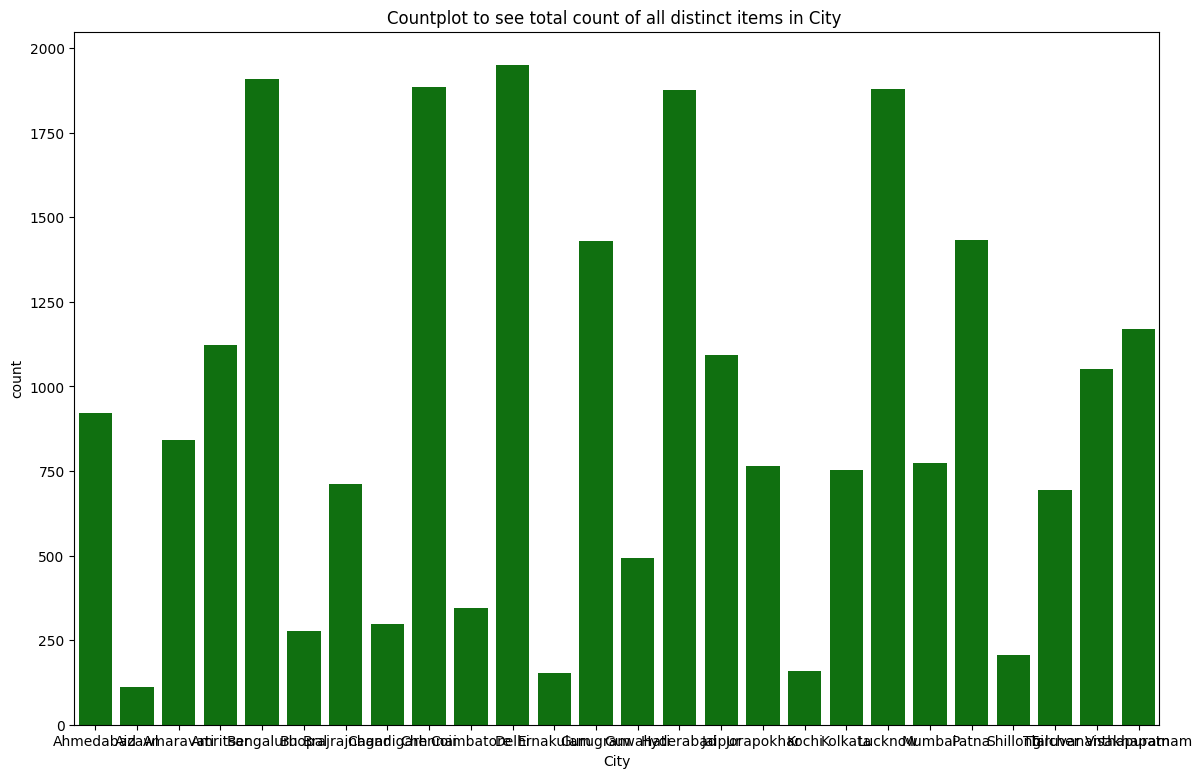

------------------------------------------------------------
Total percentage of each distinct items in City :
 City
Delhi                 8.027155
Bengaluru             7.858465
Chennai               7.751491
Lucknow               7.726805
Hyderabad             7.718576
Patna                 5.895906
Gurugram              5.887677
Visakhapatnam         4.817939
Amritsar              4.616334
Jaipur                4.501131
Thiruvananthapuram    4.328328
Ahmedabad             3.789344
Amaravati             3.460193
Mumbai                3.188644
Jorapokhar            3.143386
Kolkata               3.102242
Brajrajnagar          2.933553
Talcher               2.855380
Guwahati              2.028389
Coimbatore            1.415347
Chandigarh            1.230200
Bhopal                1.143798
Shillong              0.843448
Kochi                 0.650072
Ernakulam             0.629500
Aizawl                0.456696
Name: count, dtype: float64


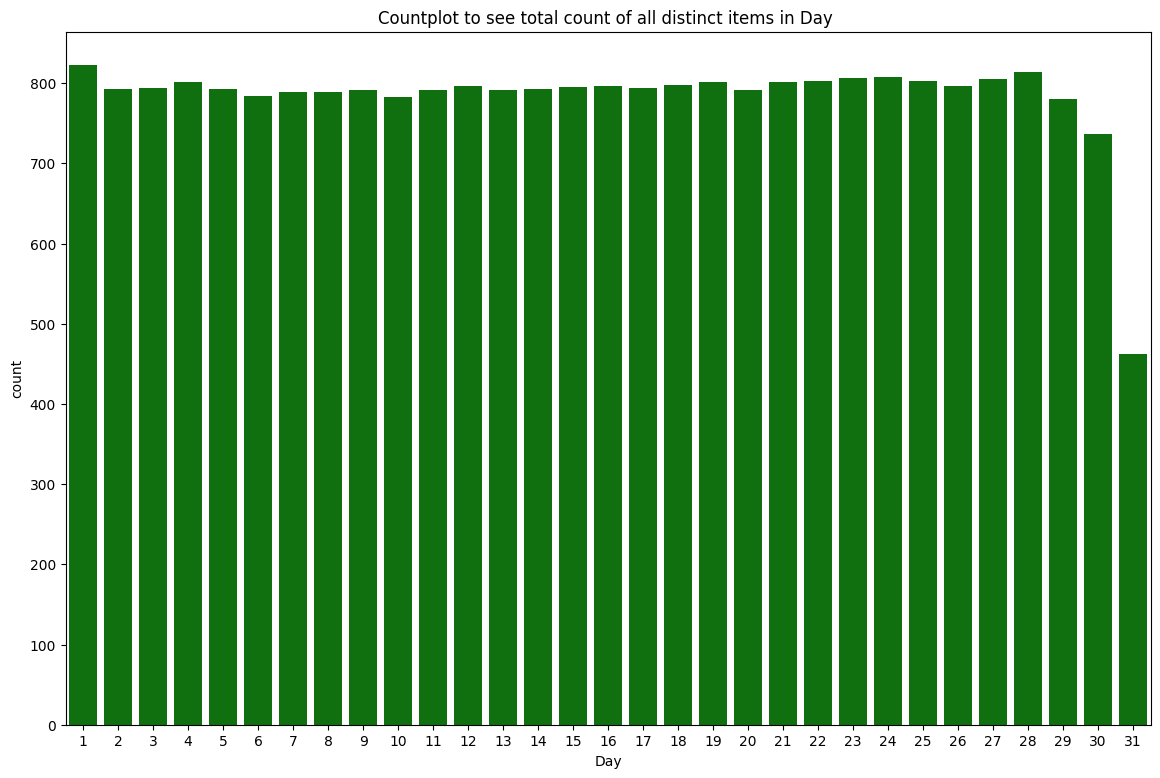

------------------------------------------------------------
Total percentage of each distinct items in Day :
 Day
1     3.386135
28    3.349105
24    3.324419
23    3.316190
27    3.312076
22    3.303847
25    3.303847
21    3.299733
19    3.295618
4     3.295618
18    3.283275
16    3.279161
12    3.275046
26    3.275046
15    3.270932
17    3.266818
3     3.266818
14    3.262703
5     3.262703
2     3.262703
11    3.258589
20    3.258589
9     3.254474
13    3.254474
7     3.246246
8     3.246246
6     3.225674
10    3.221559
29    3.209216
30    3.032298
31    1.900843
Name: count, dtype: float64


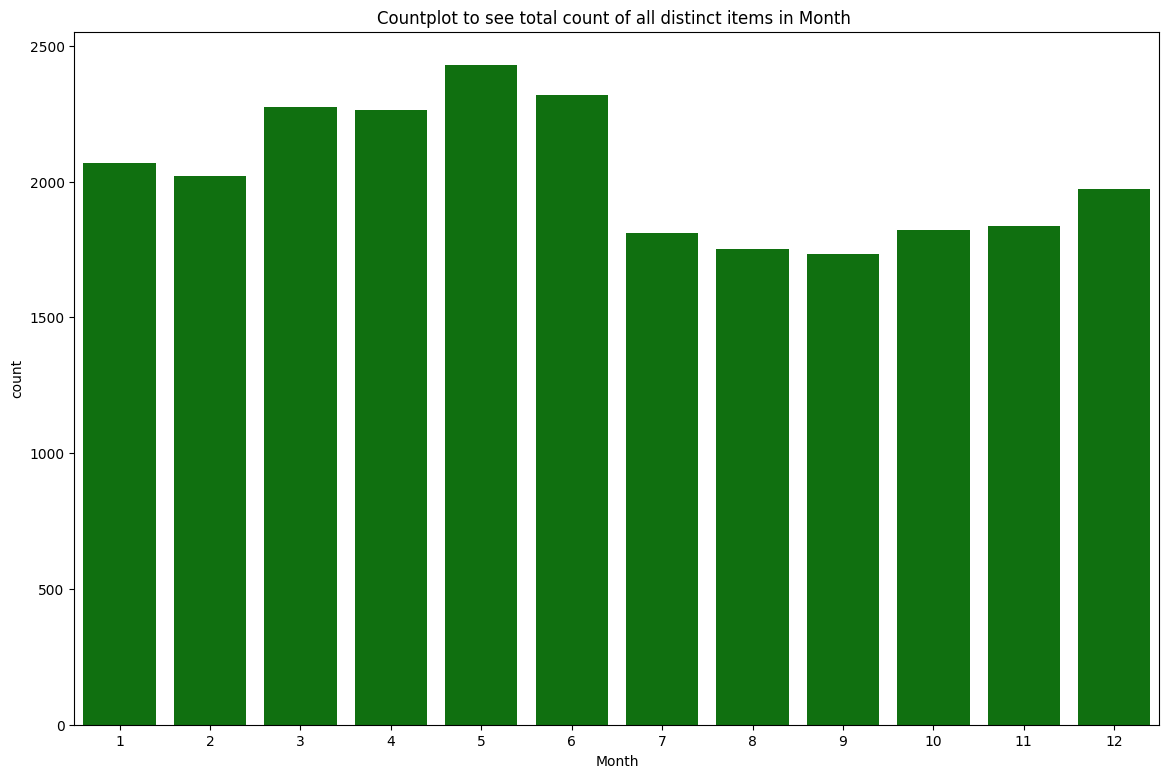

------------------------------------------------------------
Total percentage of each distinct items in Month :
 Month
5     9.997943
6     9.545361
3     9.351985
4     9.306727
1     8.512652
2     8.311047
12    8.117671
11    7.558116
10    7.500514
7     7.455256
8     7.208393
9     7.134334
Name: count, dtype: float64


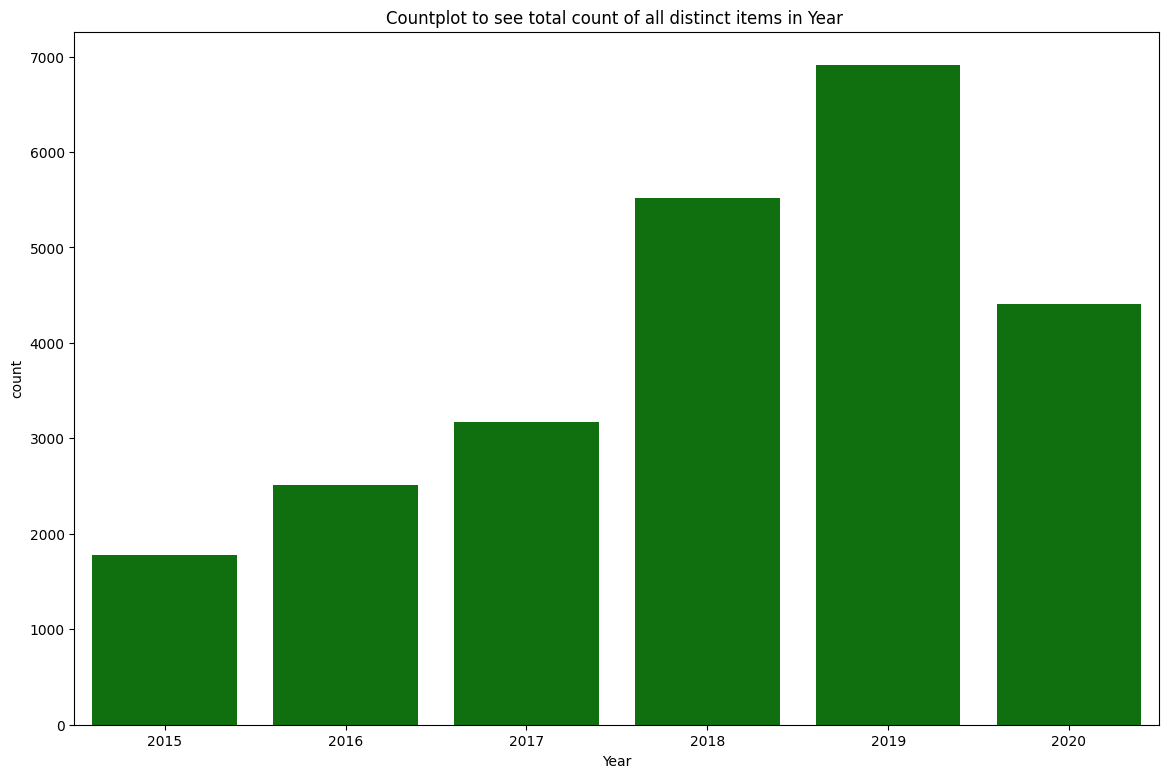

------------------------------------------------------------
Total percentage of each distinct items in Year :
 Year
2019    28.450936
2018    22.715491
2020    18.119728
2017    13.063156
2016    10.347665
2015     7.303024
Name: count, dtype: float64


In [48]:
cat_aqi=aqi_new[['City','Day','Month','Year']]
for i in cat_aqi.columns : ## Creating the for loop .
  plt.figure(figsize=(14,9))
  sns.countplot(data=cat_aqi,x=i,color='green')
  plt.title(f"Countplot to see total count of all distinct items in {i} ")
  plt.show() ## show will show the plot .
  print("------------------------------------------------------------")
  print(f"Total percentage of each distinct items in {i} :\n", (cat_aqi[i].value_counts()*100)/len(cat_aqi[i]))

Sample size wise Year 2019 has the highest sample and 2015 has the lowest .

City wise Delhi,Bengaluru,Chennai has highest amount of samples and north eastern cities has the lowest .

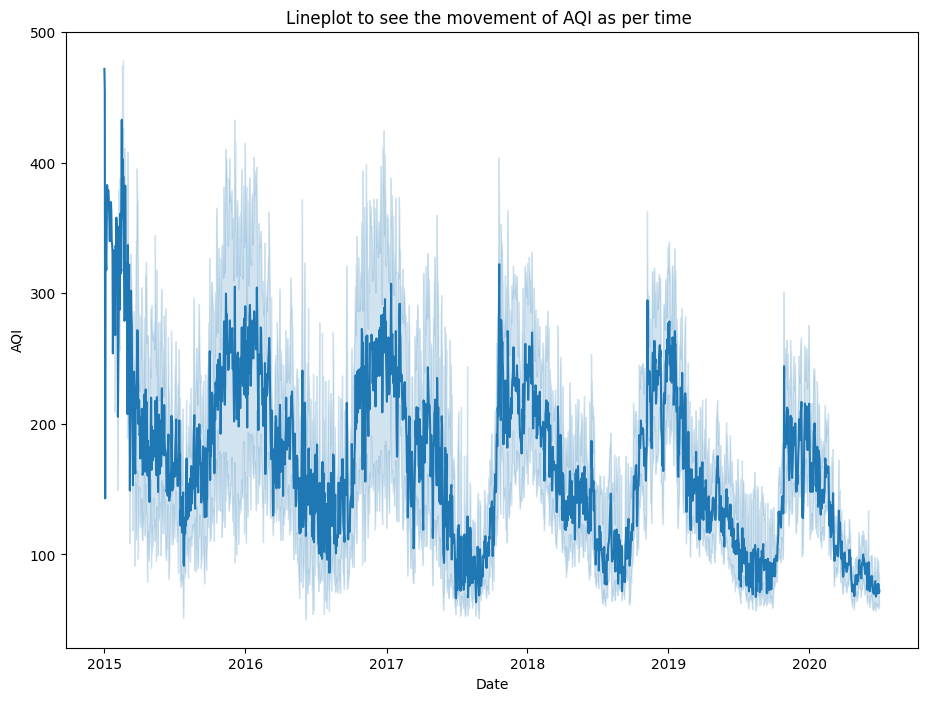

In [49]:
plt.figure(figsize=(11,8))
sns.lineplot(data=aqi_new,x='Date',y='AQI')
plt.title("Lineplot to see the movement of AQI as per time ")
plt.show()

**Line chart of AQI :**

In this dataset we have information from 2015 till 2020 . In this linechart of AQI it is clearly visisble that AQI significantly increases in the winter and it drastically drops in monsoon and this pattern continues for Five yeras .

In [50]:
## Using group by to group the data by preferred column and then create a barplot to see the results more precisely .
top_10_city=aqi_new[['City','AQI','PM_10','PM2_5']].groupby('City').mean('AQI','PM_10','PM2_5').sort_values('AQI',ascending=False).head(10)
top_10_city

AQI       PM_10       PM2_5
City                                            
Ahmedabad     291.492942  165.604943   58.090384
Delhi         252.105074  220.859664  111.143154
Patna         235.368458  207.001473  118.831970
Gurugram      219.407407  199.573624  109.332883
Lucknow       215.193823  186.474727  107.185978
Talcher       170.828530  163.288177   60.632941
Jorapokhar    155.585079  148.426022   64.625229
Brajrajnagar  150.280505  123.634713   63.336274
Kolkata       140.566313  116.082175   64.653342
Guwahati      137.040568  112.155801   61.851088

Ahmedabad has the highest avg AQI of 291.49 .

Delhi has highest avg PM_10 of 220.85 .

Patna has the highest avg PM2.5 of 118.83 .

In [51]:
fig=px.bar(top_10_city,y='AQI',width=1050,height=650,
           title='Top 10 cities with Avg AQI')
fig.show()

**Citywise highest AQI :**

Ahmedabad has the highest avg AQI of 291.49 followed by Delhi with 252.105 .

In [52]:
## Using group by to group the data by preferred column and then create a barplot to see the results more precisely .
bottom_10_city=aqi_new[['City','AQI','PM_10','PM2_5']].groupby('City').mean('AQI','PM_10','PM2_5').sort_values('AQI',ascending=True).head(10)
bottom_10_city

AQI      PM_10      PM2_5
City                                                
Aizawl               34.765766  23.129475  16.848312
Shillong             53.795122  35.840683  24.565039
Coimbatore           73.023256  38.920326  29.426052
Thiruvananthapuram   75.878327  53.149860  28.224424
Ernakulam            92.359477  47.900000  24.898845
Bengaluru            94.318325  84.829765  35.795510
Amaravati            95.299643  76.131130  37.980395
Chandigarh           96.498328  85.795819  41.415395
Kochi               104.284810  66.114430  31.540506
Mumbai              105.352258  96.031764  35.263748

Aizwal has the lowest avg AQI of 291.49 .

Aizwal also has the lowest avg PM_10 of 23.12 and PM2.5 of 16.84 .

In [53]:
fig=px.bar(bottom_10_city,y='AQI',width=1050,height=650,
           title='Top 10 cities with Avg AQI')
fig.show()

**Citywise least AQI :**

Aizawl has the lowest avg AQI of 34.76 followed by shillong with 53.79 .

In [54]:
## Using group by to group the data by preferred column and then create a barplot to see the results more precisely .
Year_aqi=aqi_new[['Year','AQI','PM_10','PM2_5']].groupby('Year').mean('AQI','PM_10','PM2_5').sort_values('AQI',ascending=False)
Year_aqi

AQI       PM_10      PM2_5
Year                                   
2015  199.385915  163.835812  78.675077
2016  187.661233  166.159517  85.120160
2017  171.017323  150.717430  81.137570
2018  159.155950  140.842630  68.185282
2019  143.205495  118.789788  57.644572
2020  110.934378   90.961799  43.641791

In [55]:
fig=px.bar(Year_aqi,y='AQI',width=650,height=650,
           title="Year_wise avg_amount of AQI")
fig.show()

**Yearly avg AQI :**

2015 has the highest avg AQI of 199.38 and 2020 has the lowest of 110.93 .

In [56]:
## Using group by to group the data by preferred column and then create a barplot to see the results more precisely .
Month_PM_10=aqi_new[['Month','PM_10','AQI','PM2_5']].groupby('Month').mean('PM_10','AQI','PM2_5').sort_values('PM_10',ascending=False)
Month_PM_10

PM_10         AQI       PM2_5
Month                                    
12     187.822718  214.998479  108.202852
11     183.934782  212.831247  104.920757
1      182.822270  213.392460  104.582452
2      160.811298  183.076238   81.394367
10     140.532464  167.040592   72.599188
3      129.585595  148.599208   61.320726
4      118.283219  134.193634   52.073733
5      116.190166  132.391358   49.481258
6       96.343829  115.302155   41.148416
9       87.966140  108.408304   36.586692
7       84.702763  105.053532   35.889798
8       82.829063  106.459475   33.035927

Month of December has the highest avg PM_10 , AQI and PM2.5 .

Month of August has the lowest PM_10 and PM2.5 .

In [57]:
fig=px.bar(Month_PM_10,y='PM_10',width=750,height=700,
           title='Month wise highest PM_10')
fig.show()

**Monthly avg PM_10 :**   

November,December and january has the highest amount of PM_10 in air .

In monsoon or from june to september in these 4 months the PM_10 in air drops drastically .

In [58]:
aqi_new.head() ## head function will show us the top 5 rows .

City       Date  PM2_5       PM_10     NO   NO_2    NOx  \
index                                                                 
1      Ahmedabad 2015-01-29  83.13  202.106781   6.93  28.71  33.72   
2      Ahmedabad 2015-01-30  79.84  222.726928  13.85  28.68  41.08   
3      Ahmedabad 2015-02-04  80.65  177.819816   2.37  22.83  24.00   
4      Ahmedabad 2015-02-05  58.36  148.966012   2.60  21.39  23.31   
5      Ahmedabad 2015-02-06  79.29  193.834072   1.16  26.94  26.83   

            NH_3     CO   SO_2    O_3  Benzene  Toluene    AQI  Day  Month  \
index                                                                        
1      19.180451   6.93  49.52  59.76     0.02      0.0  209.0   29      1   
2      37.925330  13.85  48.49  97.07     0.04      0.0  328.0   30      1   
3      27.552862   2.37  25.73  47.30     0.00      0.0  294.0    4      2   
4      31.902713   2.60  32.66  53.54     0.00      0.0  149.0    5      2   
5       7.023861   1.16  67.41  59.30     0.00      0.0  190.0    6      2   

       Year  
index        
1      2015  
2      2015  
3      2015  
4      2015  
5      2015

In [59]:
## Scatterplot to see the relation between the target variable and indipendent variable .
fig=px.scatter(aqi_new,x='SO_2',y='AQI',width=700,height=650,
               trendline='ols',title="Scatterplot to see the relationship between AQI and SO_2")
fig.show()

SO_2 and AQi has a good positive relationship with r2_score of 0.11 .

In [60]:
fig=px.scatter(aqi_new,x='CO',y='AQI',width=700,height=650,
               trendline='ols',title="Scatterplot to see the relationship between AQI and CO")
fig.show()

Co and AQi has a good positive relationship .

In [61]:
## Scatterplot to see the relation between the target variable and indipendent variable .
fig=px.scatter(aqi_new,x='NO',y='AQI',width=700,height=650,
               trendline='ols',title="Scatterplot to see the relationship between AQI and NO")
fig.show()

NO and AQi has a good positive relationship .

In [62]:
fig=px.scatter(aqi_new,x='PM2_5',y='AQI',width=700,height=650,
               trendline='ols',title="Scatterplot to see the relationship between AQI and PM2_5")
fig.show()

PM2.5 and AQi has a very strong positive relationship with r2_score of 0.70 .

In [63]:
## Scatterplot to see the relation between the target variable and indipendent variable .
fig=px.scatter(aqi_new,x='PM_10',y='AQI',width=700,height=650,
               trendline='ols',title="Scatterplot to see the relationship between AQI and PM_10")
fig.show()

PM_10 and AQi has a very strong positive relationship with r2_score of 0.75 .

**Heatmap :**    

Heatmap basically shows the correlation between all the columns . It also shows either the correlation is positive or negative .

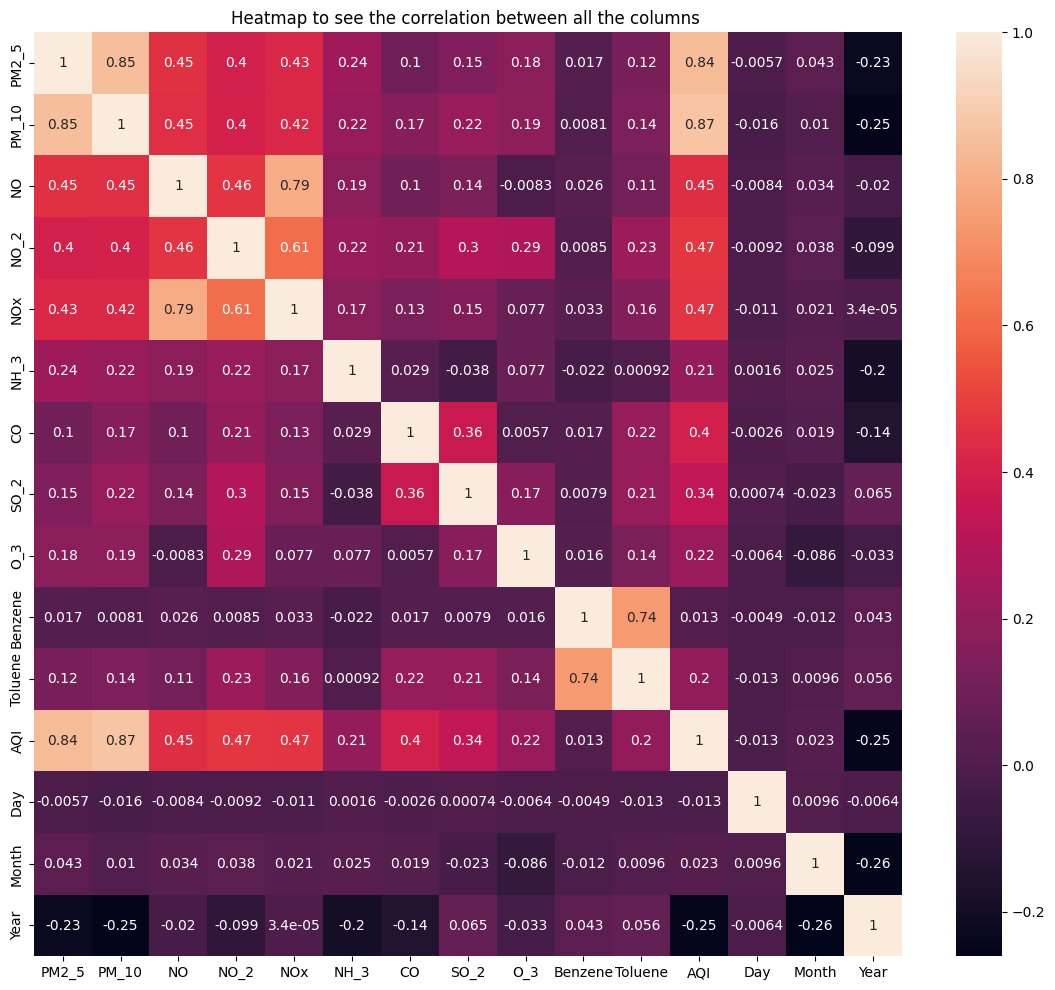

In [64]:
aqi_corrs=aqi_new.drop(['City','Date'],axis=1)
aqi_corr=aqi_corrs.corr() ## using corr() function to calculate the correlation .
plt.figure(figsize=(14,12))
sns.heatmap(data=aqi_corr,annot=True)
plt.title("Heatmap to see the correlation between all the columns ")
plt.show()

**Heatmap conclusion :**

After plotting heatmap we can clearly see that all the columns has very strong positive correlation with the target variable AQI . Only 'Day' and 'Year' do not have any positive relation with AQI . 'PM2_5' and 'PM_10' has highest positive correlation with AQI .

In [65]:
## Dropping some unnecessary columns with drop function .
numeric_aqi=aqi_new.drop(['City','Date','Day','Month','Year'],axis=1)
numeric_aqi.head()

PM2_5       PM_10     NO   NO_2    NOx       NH_3     CO   SO_2    O_3  \
index                                                                           
1      83.13  202.106781   6.93  28.71  33.72  19.180451   6.93  49.52  59.76   
2      79.84  222.726928  13.85  28.68  41.08  37.925330  13.85  48.49  97.07   
3      80.65  177.819816   2.37  22.83  24.00  27.552862   2.37  25.73  47.30   
4      58.36  148.966012   2.60  21.39  23.31  31.902713   2.60  32.66  53.54   
5      79.29  193.834072   1.16  26.94  26.83   7.023861   1.16  67.41  59.30   

       Benzene  Toluene    AQI  
index                           
1         0.02      0.0  209.0  
2         0.04      0.0  328.0  
3         0.00      0.0  294.0  
4         0.00      0.0  149.0  
5         0.00      0.0  190.0

Creating a for loop of boxplot after imputing all the null values to see the outliers , min , max , skewness and extreme outliers of all numerical columns .



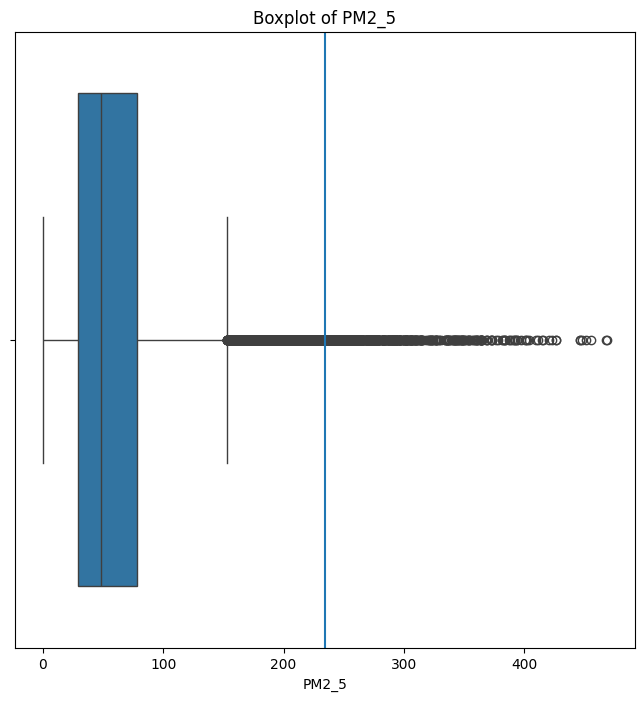

----------------------------------
Min value of PM2_5 : 0.04
Max value of PM2_5 : 468.59
Skewness of PM2_5 : 2.2288277750489085
Anything more than this value can be considered as Outliers for PM2_5 : 153.11
Value of Mean+3sd in positive side for PM2_5 : 234.8163761977827


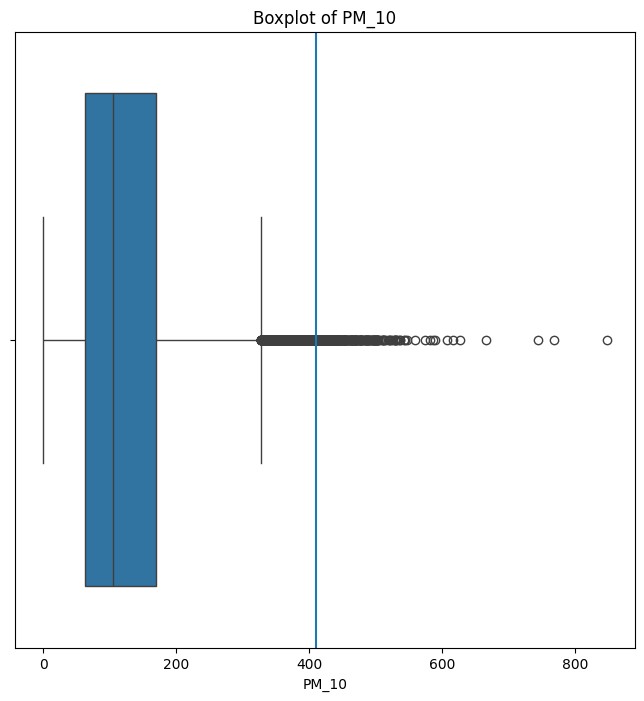

----------------------------------
Min value of PM_10 : 0.03
Max value of PM_10 : 847.41
Skewness of PM_10 : 1.3935837063986536
Anything more than this value can be considered as Outliers for PM_10 : 327.57500000000005
Value of Mean+3sd in positive side for PM_10 : 410.4751740049603


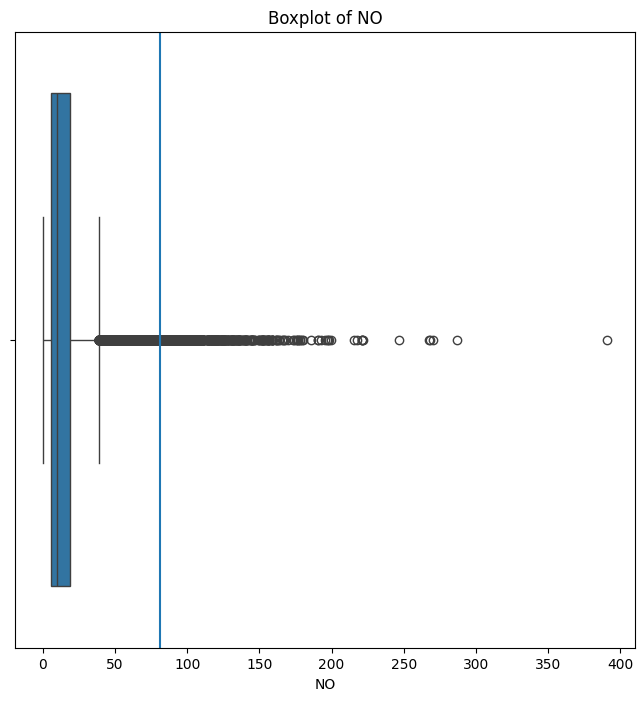

----------------------------------
Min value of NO : 0.03
Max value of NO : 390.68
Skewness of NO : 3.68041626834348
Anything more than this value can be considered as Outliers for NO : 38.7
Value of Mean+3sd in positive side for NO : 81.36949789072864


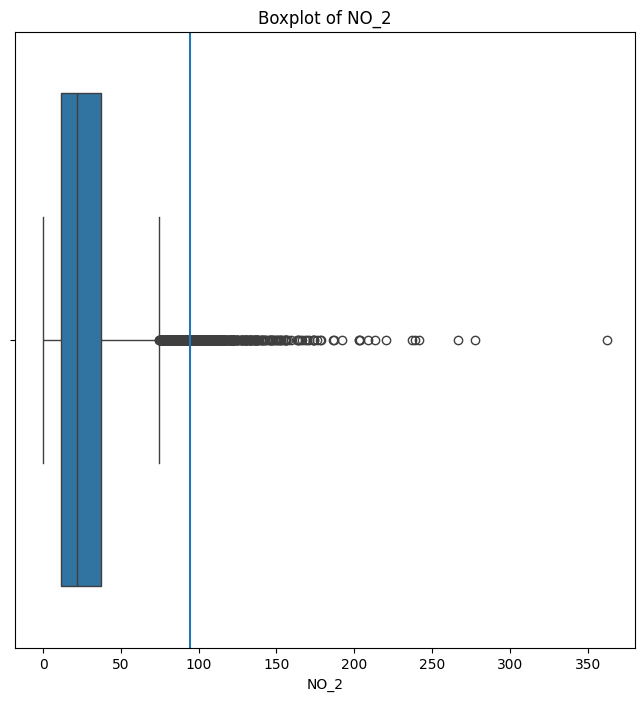

----------------------------------
Min value of NO_2 : 0.01
Max value of NO_2 : 362.21
Skewness of NO_2 : 2.162243363356039
Anything more than this value can be considered as Outliers for NO_2 : 74.76
Value of Mean+3sd in positive side for NO_2 : 94.25554970947434


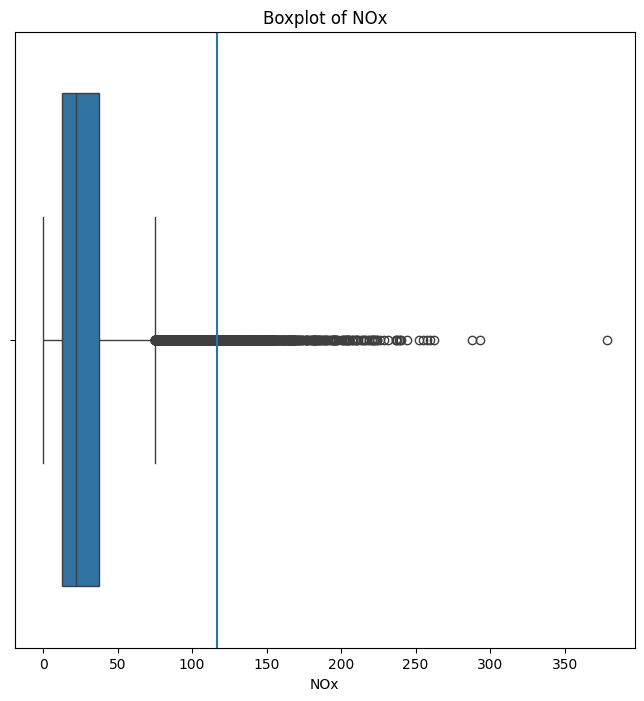

----------------------------------
Min value of NOx : 0.0
Max value of NOx : 378.24
Skewness of NOx : 2.555095649054188
Anything more than this value can be considered as Outliers for NOx : 74.88999999999999
Value of Mean+3sd in positive side for NOx : 116.92451364459009


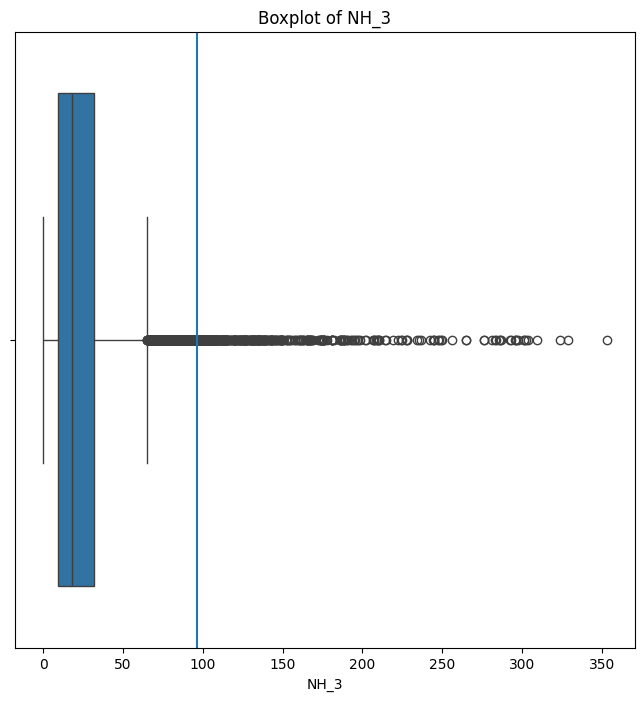

----------------------------------
Min value of NH_3 : 0.01
Max value of NH_3 : 352.89
Skewness of NH_3 : 3.9504761988385715
Anything more than this value can be considered as Outliers for NH_3 : 65.295
Value of Mean+3sd in positive side for NH_3 : 96.54607994891731


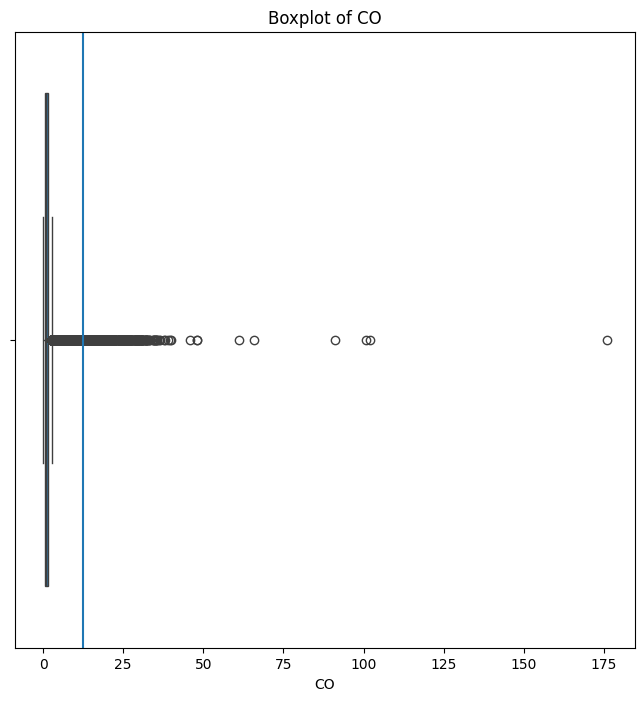

----------------------------------
Min value of CO : 0.0
Max value of CO : 175.81
Skewness of CO : 11.715719665635488
Anything more than this value can be considered as Outliers for CO : 2.705
Value of Mean+3sd in positive side for CO : 12.50060711691789


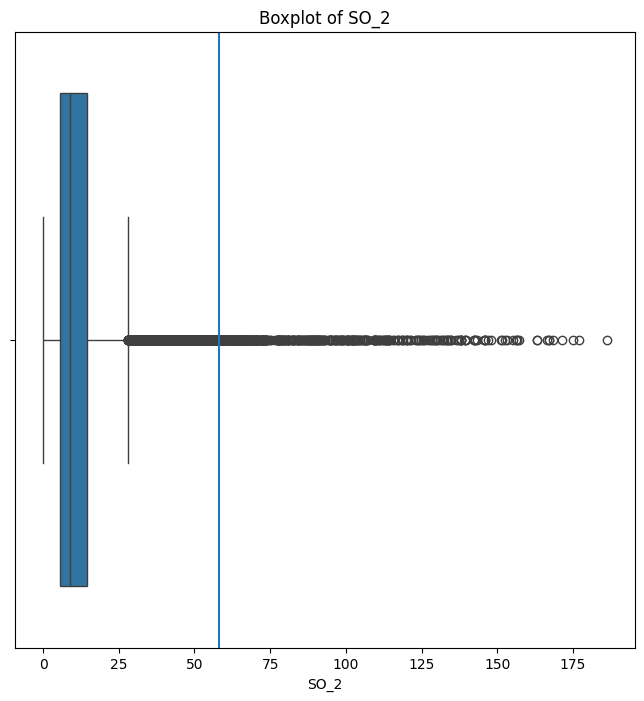

----------------------------------
Min value of SO_2 : 0.01
Max value of SO_2 : 186.08
Skewness of SO_2 : 4.164631564331352
Anything more than this value can be considered as Outliers for SO_2 : 28.105000000000004
Value of Mean+3sd in positive side for SO_2 : 57.973707804884924


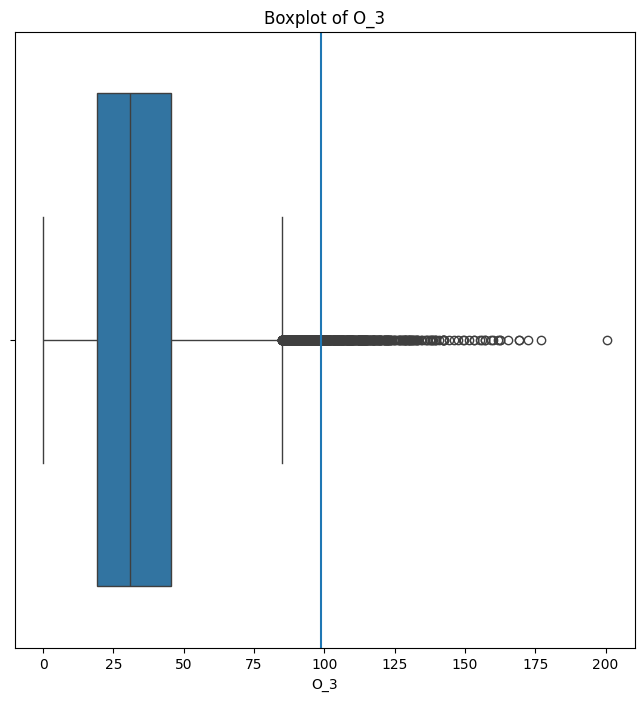

----------------------------------
Min value of O_3 : 0.01
Max value of O_3 : 200.41
Skewness of O_3 : 1.2683951607864943
Anything more than this value can be considered as Outliers for O_3 : 84.92500000000001
Value of Mean+3sd in positive side for O_3 : 98.66760607908093


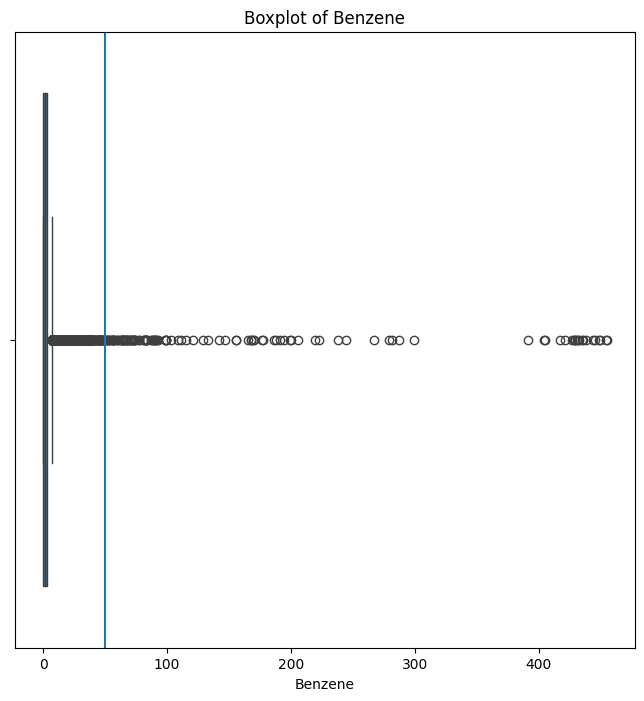

----------------------------------
Min value of Benzene : 0.0
Max value of Benzene : 455.03
Skewness of Benzene : 21.367369818047862
Anything more than this value can be considered as Outliers for Benzene : 7.175000000000001
Value of Mean+3sd in positive side for Benzene : 49.91363918205593


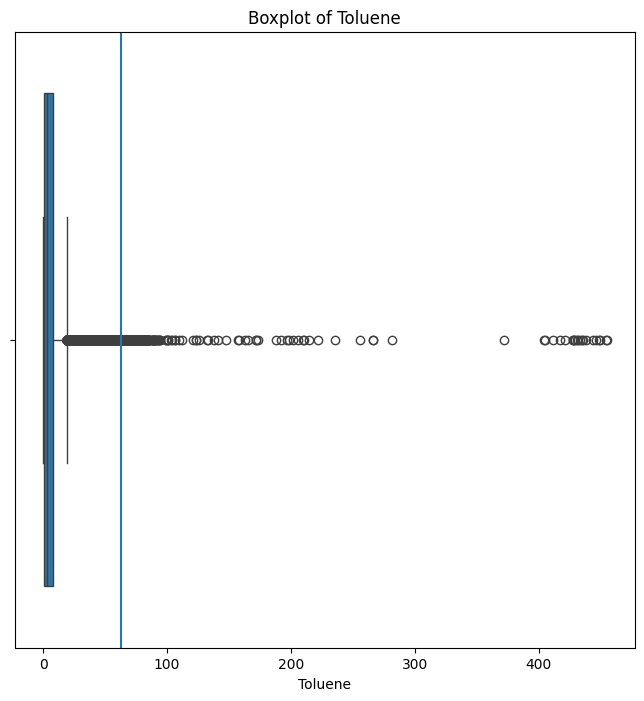

----------------------------------
Min value of Toluene : 0.0
Max value of Toluene : 454.85
Skewness of Toluene : 13.404871325748386
Anything more than this value can be considered as Outliers for Toluene : 19.15
Value of Mean+3sd in positive side for Toluene : 62.55204529589296


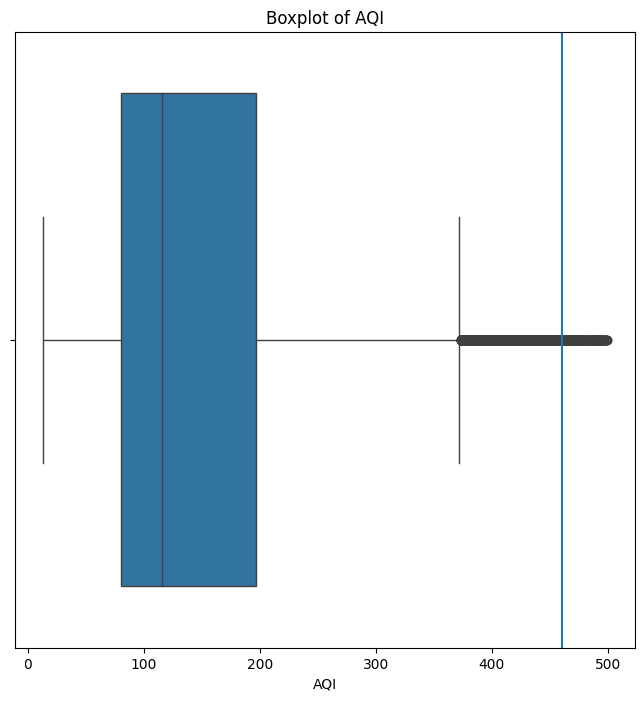

----------------------------------
Min value of AQI : 13.0
Max value of AQI : 499.0
Skewness of AQI : 1.266205431364787
Anything more than this value can be considered as Outliers for AQI : 372.5
Value of Mean+3sd in positive side for AQI : 460.15451926393314


In [66]:
for i in numeric_aqi.columns : ## Creating the for loop .
  plt.figure(figsize=(8,8))
  sns.boxplot(data=numeric_aqi,x=i)
  plt.axvline(x=numeric_aqi[i].mean()+3*(numeric_aqi[i].std()))
  plt.title(f"Boxplot of {i}")
  plt.show()
  print("----------------------------------")
  print(f"Min value of {i} :", numeric_aqi[i].min())
  print(f"Max value of {i} :", numeric_aqi[i].max())
  print(f"Skewness of {i} :", numeric_aqi[i].skew())
  print(f"Anything more than this value can be considered as Outliers for {i} :", np.percentile(numeric_aqi[i],75,interpolation='midpoint')
  +1.5*(np.percentile(numeric_aqi[i],75,interpolation='midpoint')-np.percentile(numeric_aqi[i],25,interpolation='midpoint')))
  print(f"Value of Mean+3sd in positive side for {i} :",numeric_aqi[i].mean()+3*(numeric_aqi[i].std()))

All of these columns has extreme values in their positive side . in a normal distribution 99% datapoints fall between (mean-3*sd) to (mean+3*sd) . I have not taken the outliers range because then i have to drop a good amount of datapoints . all the datapoints which will get excedded a little more than (mean+3sd) will get dropped . this will make our dataset less skewed .

In [67]:
aqi_model=aqi_new.copy()
aqi_model.head() ## head function will show us the top 5 rows .

City       Date  PM2_5       PM_10     NO   NO_2    NOx  \
index                                                                 
1      Ahmedabad 2015-01-29  83.13  202.106781   6.93  28.71  33.72   
2      Ahmedabad 2015-01-30  79.84  222.726928  13.85  28.68  41.08   
3      Ahmedabad 2015-02-04  80.65  177.819816   2.37  22.83  24.00   
4      Ahmedabad 2015-02-05  58.36  148.966012   2.60  21.39  23.31   
5      Ahmedabad 2015-02-06  79.29  193.834072   1.16  26.94  26.83   

            NH_3     CO   SO_2    O_3  Benzene  Toluene    AQI  Day  Month  \
index                                                                        
1      19.180451   6.93  49.52  59.76     0.02      0.0  209.0   29      1   
2      37.925330  13.85  48.49  97.07     0.04      0.0  328.0   30      1   
3      27.552862   2.37  25.73  47.30     0.00      0.0  294.0    4      2   
4      31.902713   2.60  32.66  53.54     0.00      0.0  149.0    5      2   
5       7.023861   1.16  67.41  59.30     0.00      0.0  190.0    6      2   

       Year  
index        
1      2015  
2      2015  
3      2015  
4      2015  
5      2015

In [68]:
## Converting these rows into null which are excedding a certain range .
aqi_model.Toluene[aqi_model.Toluene>65]=np.nan
aqi_model.Benzene[aqi_model.Benzene>55]=np.nan
aqi_model.O_3[aqi_model.O_3>105]=np.nan
aqi_model.SO_2[aqi_model.SO_2>65]=np.nan
aqi_model.CO[aqi_model.CO>20]=np.nan
aqi_model.NH_3[aqi_model.NH_3>105]=np.nan
aqi_model.NOx[aqi_model.NOx>125]=np.nan
aqi_model.NO_2[aqi_model.NO_2>105]=np.nan
aqi_model.NO[aqi_model.NO>90]=np.nan

<ipython-input-68-63133202932d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-63133202932d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-63133202932d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-63133202932d>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [69]:
aqi_model.isnull().sum() ## isnull().sum() will show us the total no of null values in each column .

City         0
Date         0
PM2_5        0
PM_10        0
NO         437
NO_2       256
NOx        428
NH_3       316
CO         233
SO_2       366
O_3        234
Benzene    114
Toluene    220
AQI          0
Day          0
Month        0
Year         0
dtype: int64

In [70]:
aqi_model=aqi_model.dropna() ## Dropping all the null values from the dataset .
print("Total_size :", aqi_new.shape)
print("Total_size after dropping all the extreme values :", aqi_model.shape)

Total_size : (24305, 17)
Total_size after dropping all the extreme values : (22417, 17)


In [71]:
## Dropping some unnecessary columns with drop function .
aqi_model=aqi_model.drop(['City','Date'],axis=1)
aqi_model.head()

PM2_5       PM_10     NO   NO_2    NOx       NH_3     CO   SO_2    O_3  \
index                                                                           
1      83.13  202.106781   6.93  28.71  33.72  19.180451   6.93  49.52  59.76   
2      79.84  222.726928  13.85  28.68  41.08  37.925330  13.85  48.49  97.07   
3      80.65  177.819816   2.37  22.83  24.00  27.552862   2.37  25.73  47.30   
4      58.36  148.966012   2.60  21.39  23.31  31.902713   2.60  32.66  53.54   
7      74.28  354.767080   8.92  27.30  33.42   9.635155   8.92  54.28  47.42   

       Benzene  Toluene    AQI  Day  Month  Year  
index                                             
1         0.02      0.0  209.0   29      1  2015  
2         0.04      0.0  328.0   30      1  2015  
3         0.00      0.0  294.0    4      2  2015  
4         0.00      0.0  149.0    5      2  2015  
7         0.00      0.0  379.0    8      2  2015

In [72]:
aqi_model.skew()

PM2_5      2.340451
PM_10      1.426742
NO         2.229965
NO_2       1.166252
NOx        1.585002
NH_3       1.477203
CO         5.280240
SO_2       2.277358
O_3        0.834398
Benzene    5.263229
Toluene    2.653292
AQI        1.344215
Day       -0.004812
Month      0.139951
Year      -0.569093
dtype: float64

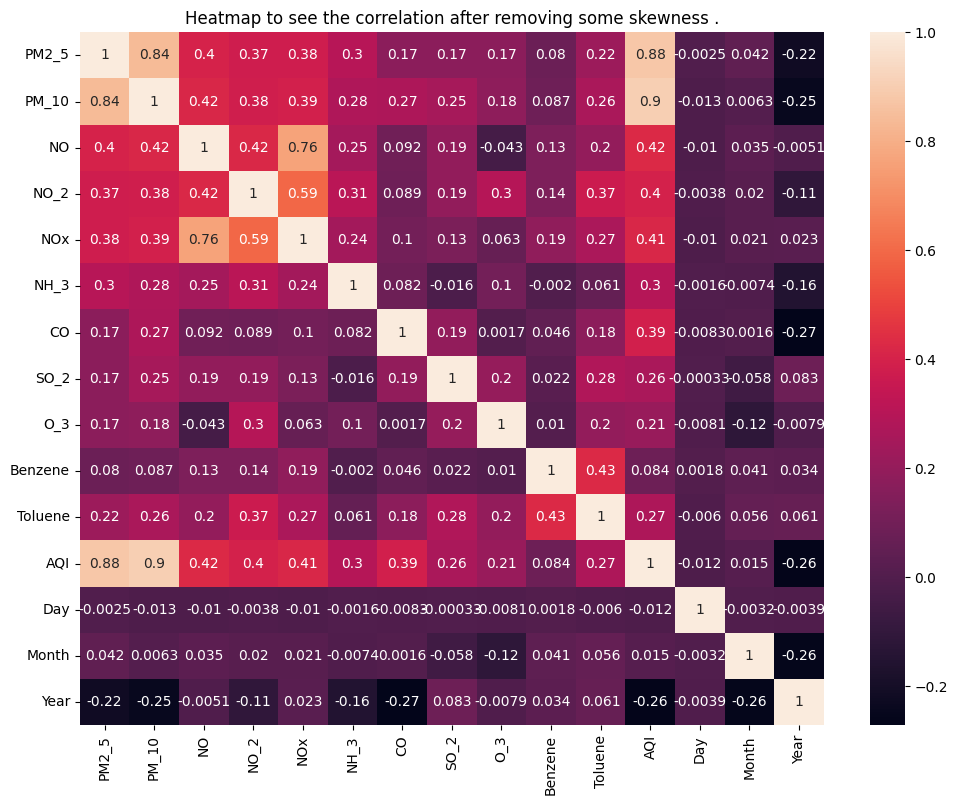

In [73]:
new_corr=aqi_model.corr() ## using corr() function to calculate the correlation .
plt.figure(figsize=(12,9))
sns.heatmap(data=new_corr,annot=True)
plt.title("Heatmap to see the correlation after removing some skewness .")
plt.show()

**Heatmap after dropping all the extreme values or outliers :**

After plotting heatmap we can clearly see that all the columns has very strong positive correlation with the target variable AQI . Only 'Day' and 'Year' do not have any positive relation with AQI .
'PM2_5' and 'PM_10' has highest positive correlation with AQI .

Dropping Day and Year column from the dataset because it does not have any positive and linear relation with AQI .

In [74]:
## Dropping some unnecessary columns with drop function to make the X dataframe .
X=aqi_model.drop(['Day','Year','AQI'],axis=1)
y=aqi_model['AQI'] ## y is the Target variable .

In [75]:
## shape function will show total no of rows and columns .
print("Size of X :", X.shape)
print("Size of y :", y.shape)

Size of X : (22417, 12)
Size of y : (22417,)


In [76]:
## train_test_split will split the dataset into training and testing .
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=15) ## test_size=0.3 means 30% of datapoints will be kept for testing and others will be used for training .

In [77]:
## shape function will show total no of rows and columns .
print(X_train.shape)
print(y_test.shape)

(15691, 12)
(6726,)


In [ ]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
SC_Xtrain=SC.fit_transform(X_train) ## Fitting and transforming our training data .
SC_Xtest=SC.transform(X_test)  ## Only transforming our testing data .

In this project i have used 6 different ML algorithms to correctly predict the AQI . I have also tuned some of the algorithms to make it more robust and accurate.

Below i have mentioned all the algorithms and where i have used hyperparameter tuning.

**ML algorithms :**

1. Linear Regression
2. DecisionTreeRegressor (Hyperparameter tuning)
3. RandomForestRegressor (Hyperparameter tuning)
4. KNeighborsRegressor
5. xgboost
6. svm or support vector machine

In the end i have compared all the algorithms to see which is giving us the least inaccuracy or least rmse .

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Evaluation_metrics in Regression :    

**1. r2_score** = r2_score basically shows how good the regression line fits or it can be described as an accuracy_score of Regression method .

**2. error :** After our algorithm predicts the outcome there are two datapoints one is original and one is predicted . the difference between the (original-predicted) can be described as an error . error can be positive or neagtive .

**3. mean_absolute_error :** mean_absolute_error sums up all the errors and then take the mean value of it by divide that by number of datapoints .

**4. mean_squraed_error :** In mean squared error it calculates the error and then square the error value . Then it sums up all the squared errors and divide that by number of observations or datapoints .

**5. rmse :** rmse stands for square root of mean_squared_error . rmse value is much closer or interpretable with the target variable .

In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(SC_Xtrain,y_train)
LR_pred=LR.predict(SC_Xtest) ## Predicting the model with X_test .
LR_pred

array([ 68.54912198, 194.0993348 ,  96.90983584, ...,  92.73324274,
       103.42556585, 351.68792541])

In [ ]:
print("r2_score for LinearRegression algorithm :",r2_score(y_test,LR_pred))

r2_score for LinearRegression algorithm : 0.8966414625944822


In [ ]:
print("Mean absolute error value for LogisticRegression :", mean_absolute_error(y_test,LR_pred))
print("Mean squared error value for LogisticRegression :", mean_squared_error(y_test,LR_pred))
print("Square root of mean squared error value for LogisticRegression :", np.sqrt(mean_absolute_error(y_test,LR_pred)))

Mean absolute error value for LogisticRegression : 20.87998721047384
Mean squared error value for LogisticRegression : 920.6017793500234
Square root of mean squared error value for LogisticRegression : 4.569462464062249


In [ ]:
print("10 % of Target variables mean :", (aqi_model['AQI'].mean()*10)/100)

10 % of Target variables mean : 14.390560735156352


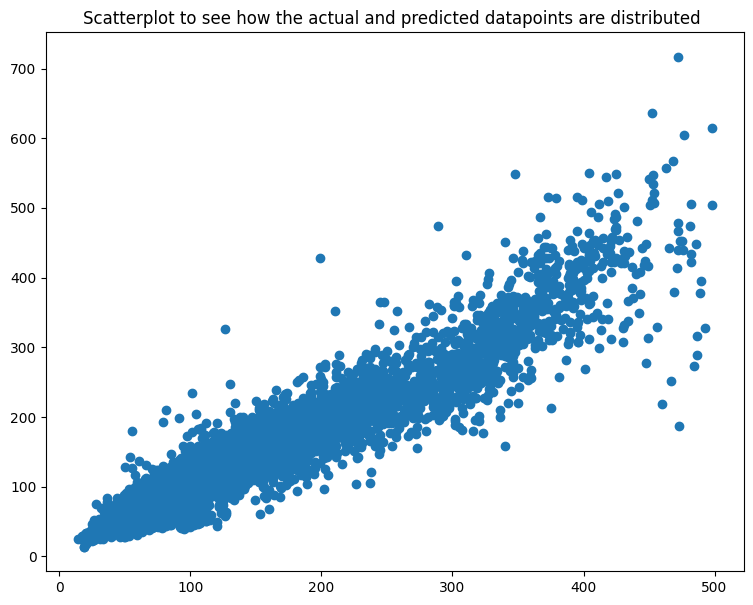

In [ ]:
## Scatterplot to see the relation between original and predicted values .
plt.figure(figsize=(9,7))
plt.scatter(y_test,LR_pred)
plt.title("Scatterplot to see how the actual and predicted datapoints are distributed ")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DC=DecisionTreeRegressor()
DC.fit(SC_Xtrain,y_train)
DC_pred=DC.predict(SC_Xtest) ## Predicting the model with X_test .
DC_pred

array([ 51., 189.,  71., ..., 100.,  90., 321.])

In [ ]:
print("r2_score for DecisionTree algorithm :",r2_score(y_test,DC_pred))

r2_score for DecisionTree algorithm : 0.8681282710666481


In [ ]:
print("Mean absolute error value for DecisionTree algorithm :", mean_absolute_error(y_test,DC_pred))
print("Mean squared error value for DecisionTree algorithm :", mean_squared_error(y_test,DC_pred))
print("Square root of mean squared error value for DecisionTree algorithm :", np.sqrt(mean_absolute_error(y_test,DC_pred)))

Mean absolute error value for DecisionTree algorithm : 22.099018733273862
Mean squared error value for DecisionTree algorithm : 1174.5652691049659
Square root of mean squared error value for DecisionTree algorithm : 4.700959341801827


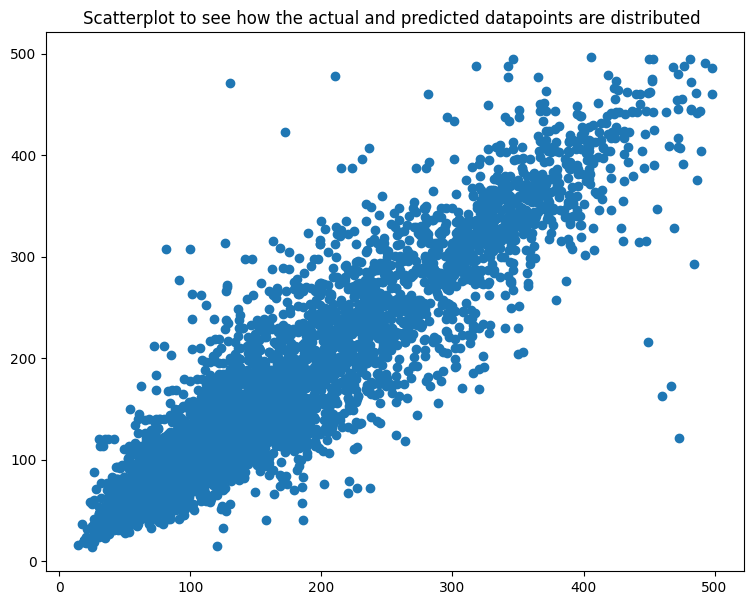

In [ ]:
## Scatterplot to see the relation between original and predicted values .
plt.figure(figsize=(9,7))
plt.scatter(y_test,DC_pred)
plt.title("Scatterplot to see how the actual and predicted datapoints are distributed ")
plt.show()

In [ ]:
## Creating a pool of parameters from where GridSearchCV will choose the best parameter .
from sklearn.model_selection import GridSearchCV
DC_params={'max_depth':[5,7,9,13],'min_samples_leaf':[8,10,12,15],
           'min_samples_split':[7,10,13,16]}
DC_grid=GridSearchCV(estimator=DC,param_grid=DC_params,verbose=1,refit=True)
DC_grid.fit(SC_Xtrain,y_train)
DC_grid.best_params_ ## best_params_ will show us the best_parameters among the pool .

Fitting 5 folds for each of 64 candidates, totalling 320 fits


{'max_depth': 9, 'min_samples_leaf': 8, 'min_samples_split': 7}

In [ ]:
New_DC=DecisionTreeRegressor(max_depth=9,min_samples_leaf=8,min_samples_split=7,criterion='squared_error')
New_DC.fit(SC_Xtrain,y_train)
New_DC_pred=New_DC.predict(SC_Xtest) ## Predicting the model with X_test .
New_DC_pred

array([ 68.55784062, 202.93258427,  84.7742915 , ...,  97.89982729,
        98.71287129, 354.28440367])

In [ ]:
print("r2_score for DecisionTree algorithm after hyperparameter tuning :",r2_score(y_test,New_DC_pred))

r2_score for DecisionTree algorithm after hyperparameter tuning : 0.9116218138889514


In [ ]:
print("Mean absolute error value for DecisionTree algorithm after hyperparameter tuning :", mean_absolute_error(y_test,New_DC_pred))
print("Mean squared error value for DecisionTree algorithm after hyperparameter tuning :", mean_squared_error(y_test,New_DC_pred))
print("Square root of mean squared error value for DecisionTree algorithm after hyperparameter tuning :", np.sqrt(mean_absolute_error(y_test,New_DC_pred)))

Mean absolute error value for DecisionTree algorithm after hyperparameter tuning : 18.28054312723029
Mean squared error value for DecisionTree algorithm after hyperparameter tuning : 787.1736329854008
Square root of mean squared error value for DecisionTree algorithm after hyperparameter tuning : 4.275575180865177


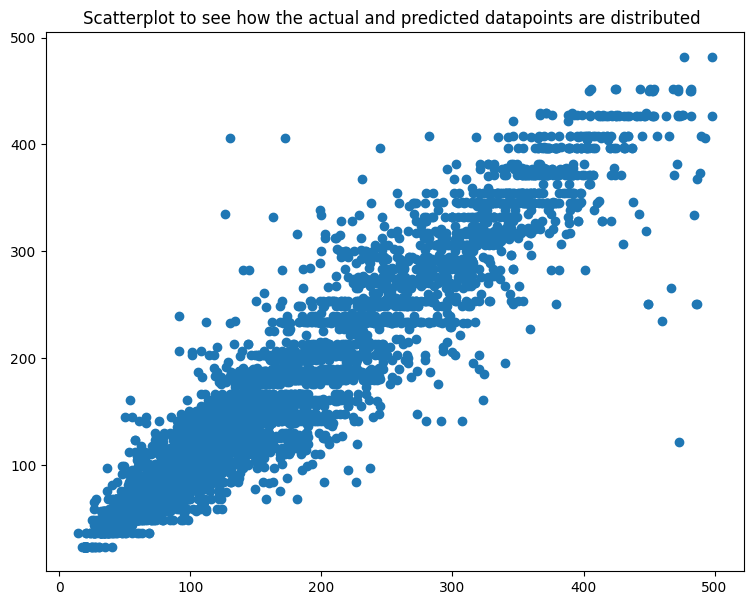

In [ ]:
## Scatterplot to see the relation between original and predicted values .
plt.figure(figsize=(9,7))
plt.scatter(y_test,New_DC_pred)
plt.title("Scatterplot to see how the actual and predicted datapoints are distributed ")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(SC_Xtrain,y_train)
RF_pred=RF.predict(SC_Xtest) ## Predicting the model with X_test .
RF_pred

array([ 71.45, 205.65,  86.26, ...,  91.82, 105.48, 343.45])

In [ ]:
print("r2_score for RandomForestRegressor algorithm :",r2_score(y_test,RF_pred))

r2_score for RandomForestRegressor algorithm algorithm : 0.9346815770988948


In [ ]:
print("Mean absolute error value for RandomForestRegressor algorithm :", mean_absolute_error(y_test,RF_pred))
print("Mean squared error value for RandomForestRegressor algorithm :", mean_squared_error(y_test,RF_pred))
print("Square root of mean squared error value for RandomForestRegressor algorithm :", np.sqrt(mean_absolute_error(y_test,RF_pred)))

Mean absolute error value for RandomForestRegressor algorithm : 15.645773119238775
Mean squared error value for RandomForestRegressor algorithm : 581.7831584745763
Square root of mean squared error value for RandomForestRegressor algorithm : 3.955473817286467


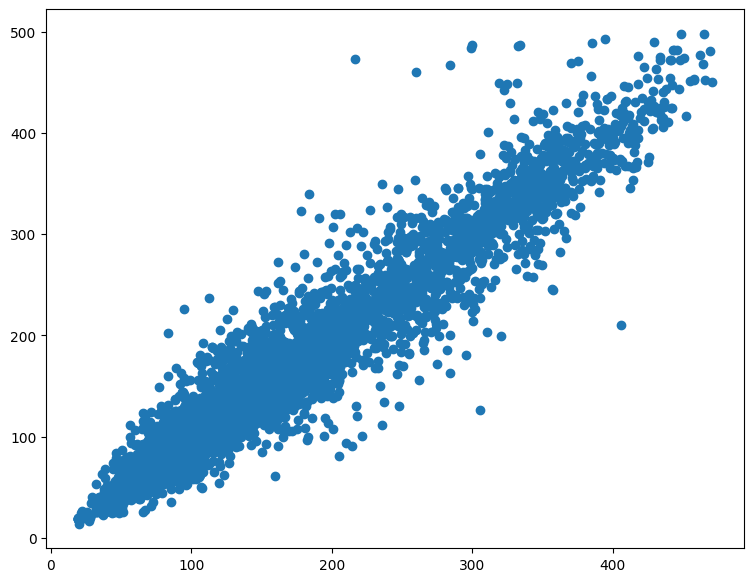

In [ ]:
## Scatterplot to see the relation between original and predicted values .
plt.figure(figsize=(9,7))
plt.scatter(RF_pred,y_test)
plt.title("Scatterplot to see how the actual and predicted datapoints are distributed ")
plt.show()

The actual and predicted datapoints are pretty close to each other in RandomForest model . It indicates that the errors will be somehow less in comparison to other algos .

In [ ]:
## Creating a pool of parameters from where GridSearchCV will choose the best parameter .
RF_params={'max_depth':[6,8,10,12,15],'n_estimators':[8,11,15,18,22,25]}
RF_grid=GridSearchCV(estimator=RF,param_grid=RF_params,verbose=1,refit=True)
RF_grid.fit(SC_Xtrain,y_train)
RF_grid.best_params_ ## best_params_ will show us the best_parameters among the pool .

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'max_depth': 15, 'n_estimators': 22}

In [ ]:
New_RF=RandomForestRegressor(n_estimators=22,max_depth=15,criterion='squared_error')
New_RF.fit(SC_Xtrain,y_train)
New_RF_pred=New_RF.predict(SC_Xtest) ## Predicting the model with X_test .
New_RF_pred

array([ 67.64287641, 204.56349567,  85.15290517, ...,  90.38931217,
       106.29651509, 341.32331107])

In [ ]:
print("r2_score for RandomForestRegressor algorithm after hyperparameter tuning :",r2_score(y_test,New_RF_pred))

r2_score for RandomForestRegressor algorithm after hyperparameter tuning : 0.9328419083509892


In [ ]:
print("Mean absolute error value for RandomForestRegressor algorithm after hyperparameter tuning :", mean_absolute_error(y_test,New_RF_pred))
print("Mean squared error value for RandomForestRegressor algorithm after hyperparameter tuning:", mean_squared_error(y_test,New_RF_pred))
print("Square root of mean squared error value for RandomForestRegressor algorithm after hyperparameter tuning :", np.sqrt(mean_absolute_error(y_test,New_RF_pred)))

Mean absolute error value for RandomForestRegressor algorithm after hyperparameter tuning : 15.922224971114861
Mean squared error value for RandomForestRegressor algorithm after hyperparameter tuning: 598.1688617289846
Square root of mean squared error value for RandomForestRegressor algorithm after hyperparameter tuning : 3.990266278221901


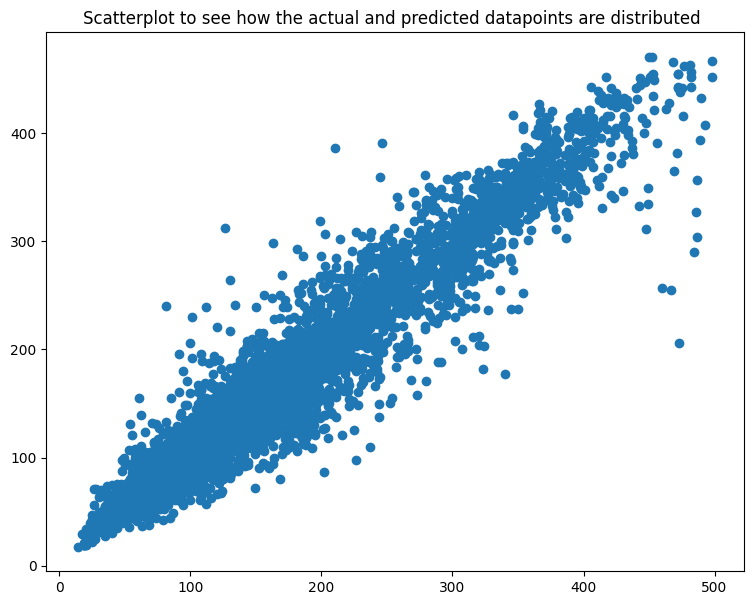

In [ ]:
## Scatterplot to see the relation between original and predicted values .
plt.figure(figsize=(9,7))
plt.scatter(y_test,New_RF_pred)
plt.title("Scatterplot to see how the actual and predicted datapoints are distributed ")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNR=KNeighborsRegressor(n_neighbors=5,metric='minkowski')
KNR.fit(SC_Xtrain,y_train)
KNR_pred=KNR.predict(SC_Xtest) ## Predicting the model with X_test .
KNR_pred

array([ 59. , 187.4,  79.2, ...,  98. , 112.4, 346.8])

In [ ]:
print("r2_score for KNeighborsRegressor algorithm :",r2_score(y_test,KNR_pred))

r2_score for KNeighborsRegressor algorithm : 0.9168110708725669


In [ ]:
print("Mean absolute error value for KNeighborsRegressor algorithm :", mean_absolute_error(y_test,KNR_pred))
print("Mean squared error value for KNeighborsRegressor algorithm :", mean_squared_error(y_test,KNR_pred))
print("Square root of mean squared error value for KNeighborsRegressor algorithm :", np.sqrt(mean_absolute_error(y_test,KNR_pred)))

Mean absolute error value for KNeighborsRegressor algorithm : 17.97279214986619
Mean squared error value for KNeighborsRegressor algorithm : 740.9535593220338
Square root of mean squared error value for KNeighborsRegressor algorithm : 4.239432998629202


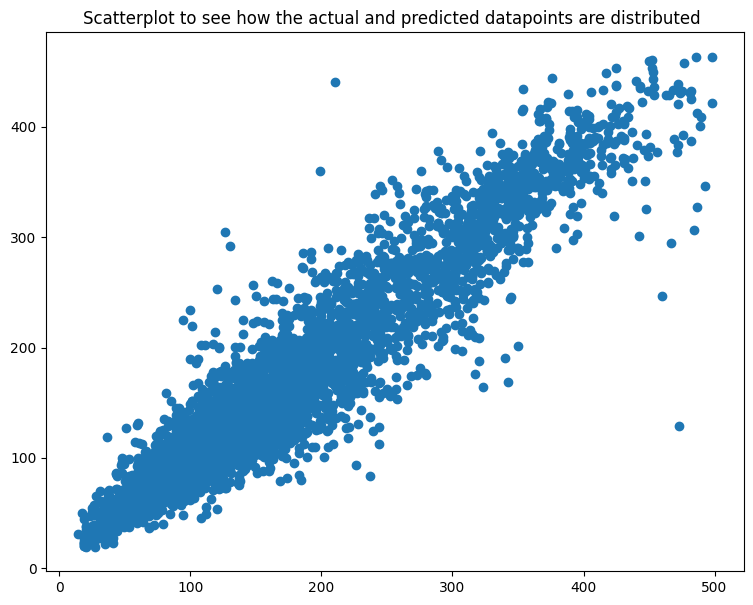

In [ ]:
## Scatterplot to see the relation between original and predicted values .
plt.figure(figsize=(9,7))
plt.scatter(y_test,KNR_pred)
plt.title("Scatterplot to see how the actual and predicted datapoints are distributed ")
plt.show()

In [ ]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(SC_Xtrain,y_train)
xgb_pred=xgb_model.predict(SC_Xtest) ## Predicting the model with X_test .
xgb_pred

array([ 71.8151  , 232.53865 ,  94.329994, ...,  88.37768 ,  97.06494 ,
       343.93042 ], dtype=float32)

In [ ]:
print("r2_score for XGBOOSTRegressor algorithm :",r2_score(y_test,xgb_pred))

r2_score for XGBOOSTRegressor algorithm : 0.9339223913927528


In [ ]:
print("Mean absolute error value for XGBOOSTRegressor algorithm :", mean_absolute_error(y_test,xgb_pred))
print("Mean squared error value for XGBOOSTRegressor algorithm :", mean_squared_error(y_test,xgb_pred))
print("Square root of mean squared error value for XGBOOSTRegressor algorithm :", np.sqrt(mean_absolute_error(y_test,xgb_pred)))

Mean absolute error value for XGBOOSTRegressor algorithm : 15.819470170492082
Mean squared error value for XGBOOSTRegressor algorithm : 588.5451321777191
Square root of mean squared error value for XGBOOSTRegressor algorithm : 3.9773697553146956


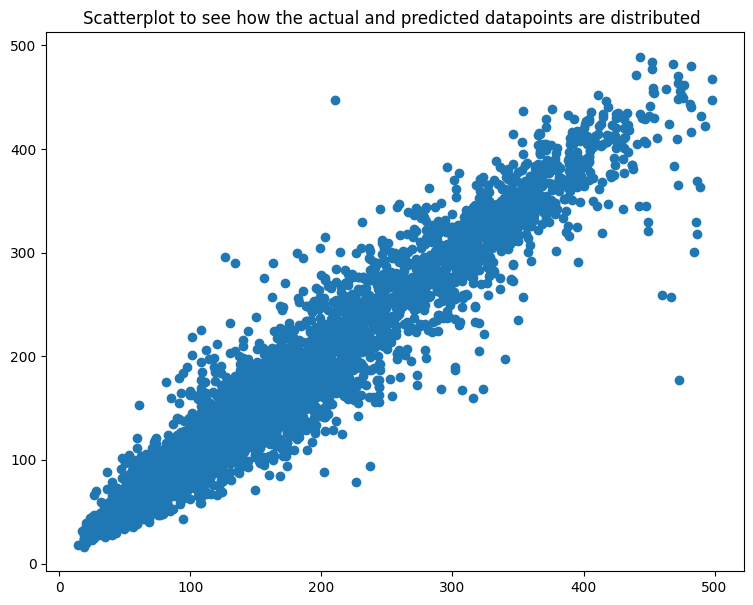

In [ ]:
## Scatterplot to see the relation between original and predicted values .
plt.figure(figsize=(9,7))
plt.scatter(y_test,xgb_pred)
plt.title("Scatterplot to see how the actual and predicted datapoints are distributed ")
plt.show()

In [ ]:
from sklearn import svm
svm_model=svm.SVR(kernel='linear',C=0.1,gamma=1)
svm_model.fit(SC_Xtrain,y_train)
svm_pred=svm_model.predict(SC_Xtest) ## Predicting the model with X_test .
svm_pred

array([ 66.21954563, 185.73764721,  92.20119062, ...,  88.58893055,
        97.95939536, 349.60264511])

In [ ]:
print("r2_score for svmregressor algorithm :",r2_score(y_test,svm_pred))

r2_score for svmregressor algorithm : 0.8940613647732583


In [ ]:
print("Mean absolute error value for svmregressor algorithm :", mean_absolute_error(y_test,svm_pred))
print("Mean squared error value for svmregressor algorithm :", mean_squared_error(y_test,svm_pred))
print("Square root of mean squared error value for svmregressor algorithm :", np.sqrt(mean_absolute_error(y_test,svm_pred)))

Mean absolute error value for svmregressor algorithm : 20.47308375660597
Mean squared error value for svmregressor algorithm : 943.5823932861214
Square root of mean squared error value for svmregressor algorithm : 4.524719190911848


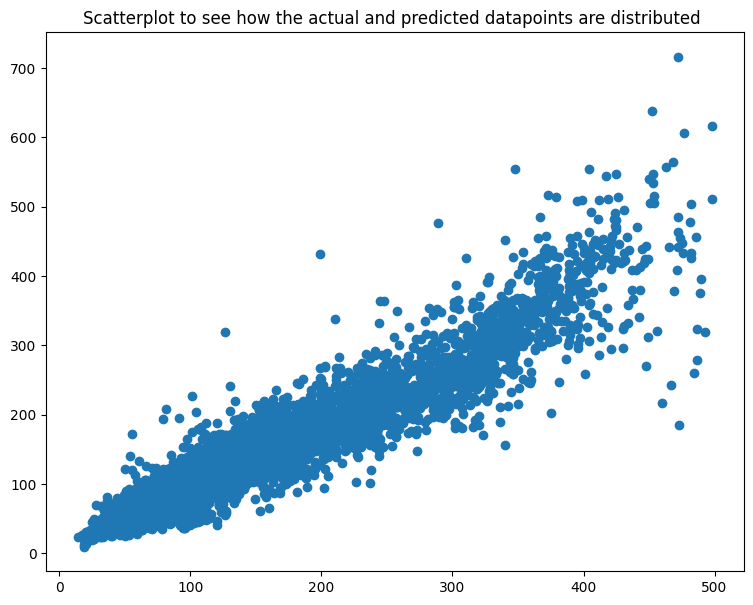

In [ ]:
## Scatterplot to see the relation between original and predicted values .
plt.figure(figsize=(9,7))
plt.scatter(y_test,svm_pred)
plt.title("Scatterplot to see how the actual and predicted datapoints are distributed ")
plt.show()

**r2_score comparison :**    

**r2_score basically shows how good the regression line fits and how good the model is .**

1. r2_score for LinearRegression algorithm : 0.8966
2. r2_score for DecisionTree algorithm : 0.8691
3. r2_score for DecisionTree algorithm after hyperparameter tuning : 0.9116
4. r2_score for RandomForestRegressor algorithm : 0.9346
5. r2_score for RandomForestRegressor algorithm after hyperparameter tuning : 0.9328
6. r2_score for KNeighborsRegressor algorithm : 0.9168
7. r2_score for XGBOOSTRegressor algorithm : 0.9339
8. r2_score for svmregressor algorithm : 0.8940

r2_score describe how good our model is and according to that RandomForestRegressor giving us the highest r2_score of 93.46 % followed by XgBoostRegressor which gives around 93.39% .


**Model with least error or least RMSE :**

1. Square root of mean squared error or RMSE of LogisticRegression : 4.56
2. Square root of mean squared error or RMSE of DecisionTree algorithm : 4.70
3. Square root of mean squared error or RMSE of DecisionTree algorithm after hyperparameter tuning : 4.27
4. Square root of mean squared error or RMSE of RandomForestRegressor algorithm : 3.95
5. Square root of mean squared error or RMSE of RandomForestRegressor algorithm after hyperparameter tuning : 3.99
6. Square root of mean squared error or RMSE of KNeighborsRegressor algorithm : 4.23
7. Square root of mean squared error or RMSE of XGBOOSTRegressor algorithm : 3.97
8. Square root of mean squared error or RMSE of svmregressor algorithm : 4.52

I have taken RMSE as the evaluation metrics in this project . There is a unwriiten rule that if the value of RMSE is less than 10% of our target variables mean then the prediction is good .

In this dataset the target variable is AQI and 10% of AQI's mean is 14.39 which is much higher than all of different Ml algos .
RandomForest had given us the lowest amount of RMSE of 3.95 followed by xgboost with 3.97 . So, this 2 algorithms are the most accurate and close in comparison to original data.

# Picking the best algorithm :

In regression problem the main focus is to get the predictions as closer as possible in comparison to original datapoints . Less errors means best model . In this Project i have used 6 different ML algorithms and also used hyperparameter tuning in some to lessen the error .

RandomForestRegressor gives us the highest r2 score of 93.46% and RMSE of 3.95 which is lowest among all other algorithms .

In the second spot we have XGBoostRegressor which is very closer to RandomForest . This algorithm deliveres a r2_score of 93.39 and RMSE of 3.97

Data Science and Machine Learning will be the best friend for humanity and Nature in next few decades by analysing and predicting the possible threats .